<a href="https://colab.research.google.com/github/NishadHarsh/EDA-for-GRU-TFP/blob/main/EDA_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

# Load dataset from Google Drive
file_path = "/content/drive/My Drive/traffic.csv"
df = pd.read_csv(file_path)

# Display dataset information
df.info()

# Convert DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Display first few rows
df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


DateTime  Junction  Vehicles           ID
0 2015-11-01 00:00:00         1        15  20151101001
1 2015-11-01 01:00:00         1        13  20151101011
2 2015-11-01 02:00:00         1        10  20151101021
3 2015-11-01 03:00:00         1         7  20151101031
4 2015-11-01 04:00:00         1         9  20151101041

In [2]:
# Create separate files for each Junction
unique_junctions = df['Junction'].unique()

# Store file names
junction_files = []

for junction in unique_junctions:
    junction_df = df[df['Junction'] == junction]
    filename = f'/content/junction_{junction}.csv'
    junction_df.to_csv(filename, index=False)
    junction_files.append(filename)
    print(f"Saved {filename} with {len(junction_df)} records.")

# Save list of generated files
with open('/content/participated_files.txt', 'w') as f:
    for file in junction_files:
        f.write(file + '\n')

print('All junction files are created and listed in participated_files.txt')


Saved /content/junction_1.csv with 14592 records.
Saved /content/junction_2.csv with 14592 records.
Saved /content/junction_3.csv with 14592 records.
Saved /content/junction_4.csv with 4344 records.
All junction files are created and listed in participated_files.txt


In [3]:
# Load a specific Junction file (Change junction number as needed)
junction_id = 1  # Change this value to any junction ID
junction_file = f"/content/junction_{junction_id}.csv"

# Load the file
junction_df = pd.read_csv(junction_file)

# Convert DateTime to datetime format
junction_df['DateTime'] = pd.to_datetime(junction_df['DateTime'])

# Display first few rows
junction_df.head()


DateTime  Junction  Vehicles           ID
0 2015-11-01 00:00:00         1        15  20151101001
1 2015-11-01 01:00:00         1        13  20151101011
2 2015-11-01 02:00:00         1        10  20151101021
3 2015-11-01 03:00:00         1         7  20151101031
4 2015-11-01 04:00:00         1         9  20151101041

In [4]:
# Check for missing values
print("Missing Values:\n", junction_df.isnull().sum())

# Basic statistical summary
junction_df.describe()


Missing Values:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


DateTime  Junction      Vehicles            ID
count                14592   14592.0  14592.000000  1.459200e+04
mean   2016-08-30 23:30:00       1.0     45.052906  2.016260e+10
min    2015-11-01 00:00:00       1.0      5.000000  2.015110e+10
25%    2016-03-31 23:45:00       1.0     27.000000  2.016038e+10
50%    2016-08-30 23:30:00       1.0     40.000000  2.016083e+10
75%    2017-01-29 23:15:00       1.0     59.000000  2.017013e+10
max    2017-06-30 23:00:00       1.0    156.000000  2.017063e+10
std                    NaN       0.0     23.008345  5.779594e+06

In [5]:
# Extracting time-based features
junction_df['Year'] = junction_df['DateTime'].dt.year
junction_df['Month'] = junction_df['DateTime'].dt.month
junction_df['Day'] = junction_df['DateTime'].dt.day
junction_df['Hour'] = junction_df['DateTime'].dt.hour
junction_df['DayOfWeek'] = junction_df['DateTime'].dt.dayofweek

# Display the updated dataframe
junction_df.head()


DateTime  Junction  Vehicles           ID  Year  Month  Day  \
0 2015-11-01 00:00:00         1        15  20151101001  2015     11    1   
1 2015-11-01 01:00:00         1        13  20151101011  2015     11    1   
2 2015-11-01 02:00:00         1        10  20151101021  2015     11    1   
3 2015-11-01 03:00:00         1         7  20151101031  2015     11    1   
4 2015-11-01 04:00:00         1         9  20151101041  2015     11    1   

   Hour  DayOfWeek  
0     0          6  
1     1          6  
2     2          6  
3     3          6  
4     4          6

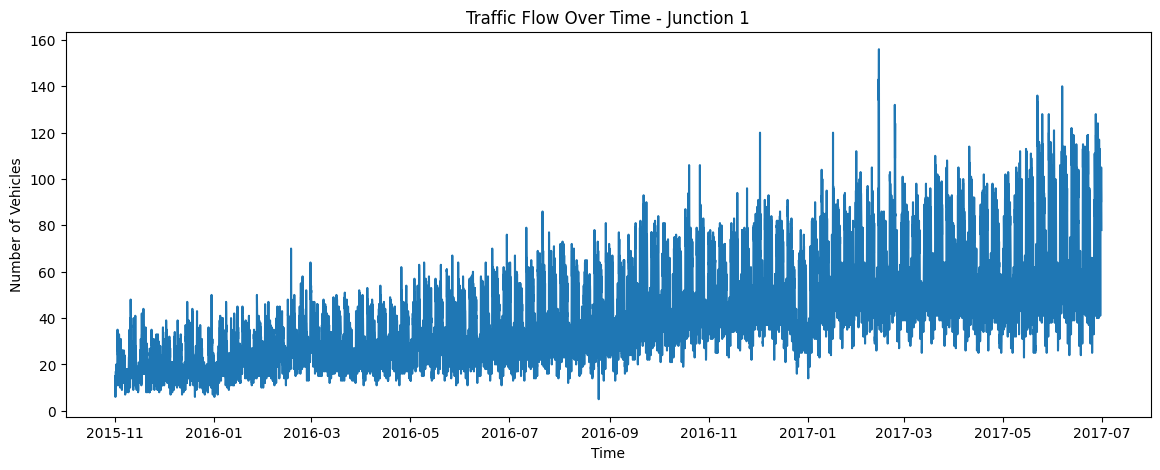

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of traffic over time
plt.figure(figsize=(14,5))
sns.lineplot(x=junction_df['DateTime'], y=junction_df['Vehicles'])
plt.title(f"Traffic Flow Over Time - Junction {junction_id}")
plt.xlabel("Time")
plt.ylabel("Number of Vehicles")
plt.show()


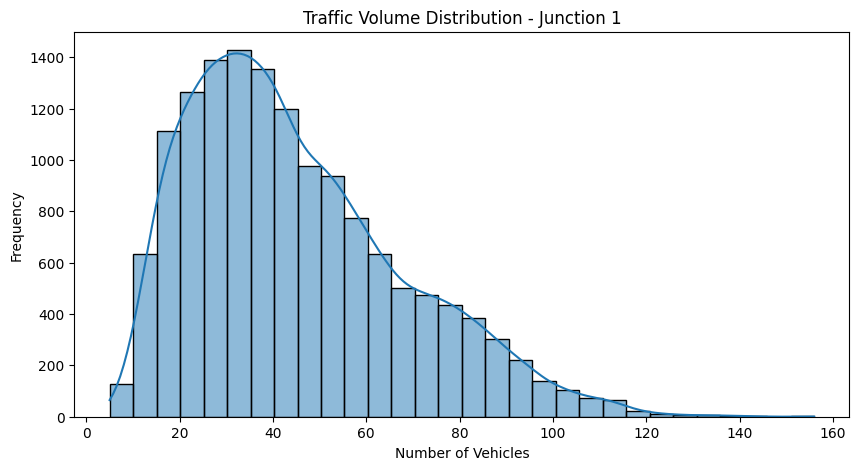

In [7]:
# Histogram for traffic volume distribution
plt.figure(figsize=(10,5))
sns.histplot(junction_df['Vehicles'], bins=30, kde=True)
plt.title(f"Traffic Volume Distribution - Junction {junction_id}")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")
plt.show()


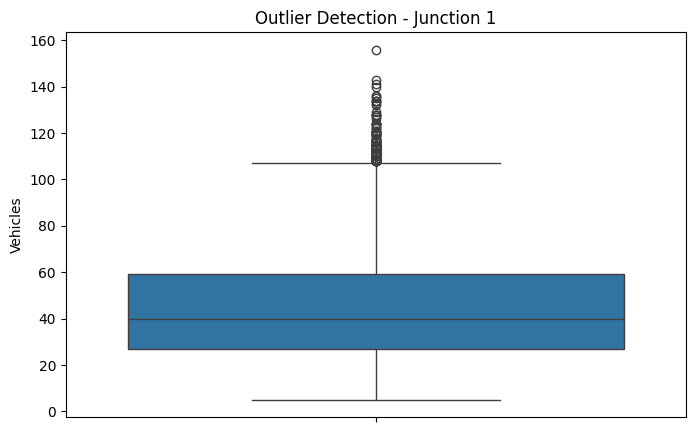

In [8]:
# Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(y=junction_df['Vehicles'])
plt.title(f"Outlier Detection - Junction {junction_id}")
plt.show()


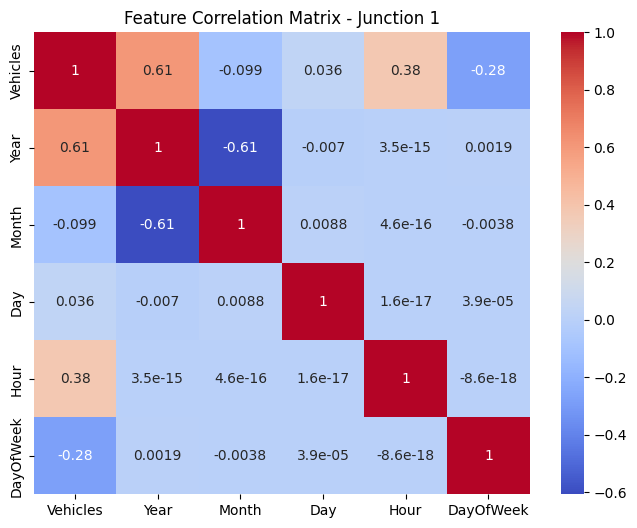

In [9]:
# Compute correlation matrix
corr_matrix = junction_df[['Vehicles', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].corr()

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title(f"Feature Correlation Matrix - Junction {junction_id}")
plt.show()


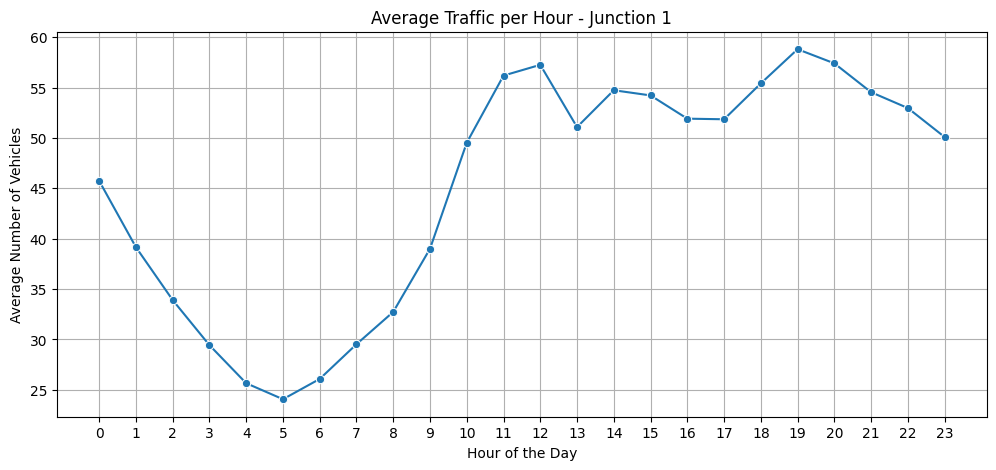

In [10]:
# Calculate the average number of vehicles for each hour
hourly_avg_traffic = junction_df.groupby('Hour')['Vehicles'].mean()

# Plot the results
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_avg_traffic.index, y=hourly_avg_traffic.values, marker="o")
plt.title(f"Average Traffic per Hour - Junction {junction_id}")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



<ipython-input-11-63b60900e370>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_avg_traffic.index, y=daily_avg_traffic.values, palette="viridis")


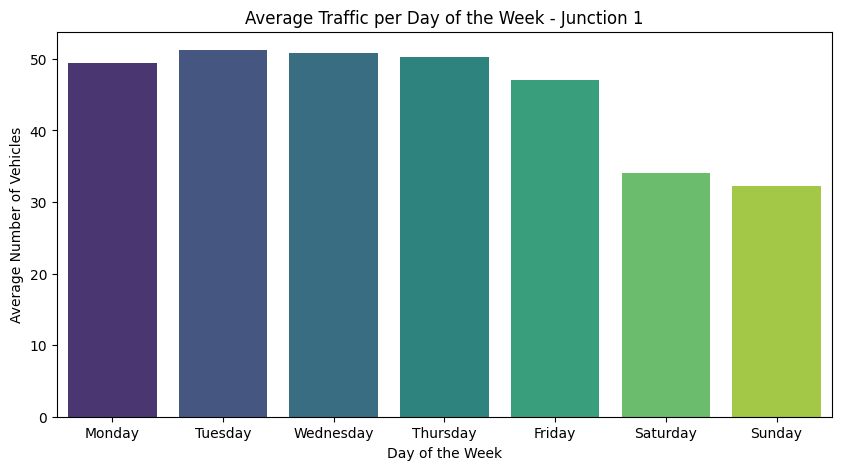

In [11]:
# Map days of the week for better readability
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Calculate average vehicles per day of the week
daily_avg_traffic = junction_df.groupby('DayOfWeek')['Vehicles'].mean()
daily_avg_traffic.index = daily_avg_traffic.index.map(days_mapping)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_avg_traffic.index, y=daily_avg_traffic.values, palette="viridis")
plt.title(f"Average Traffic per Day of the Week - Junction {junction_id}")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Vehicles")
plt.show()


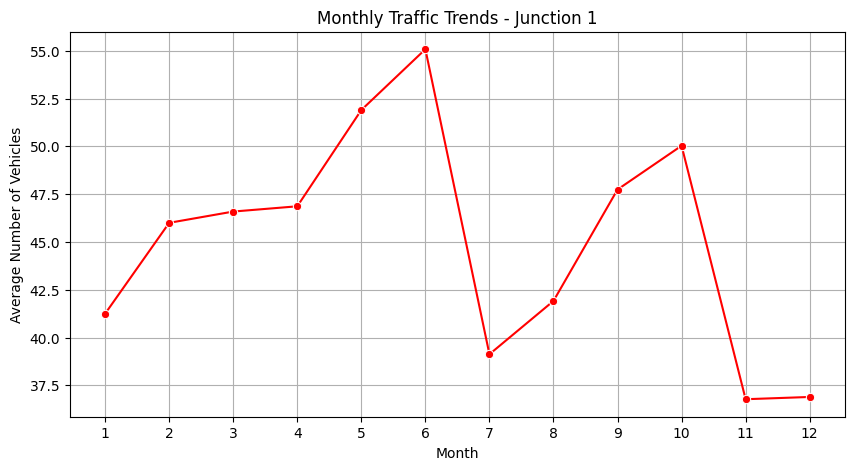

In [12]:
# Group data by month
monthly_traffic = junction_df.groupby('Month')['Vehicles'].mean()

# Plot the results
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_traffic.index, y=monthly_traffic.values, marker="o", color="red")
plt.title(f"Monthly Traffic Trends - Junction {junction_id}")
plt.xlabel("Month")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


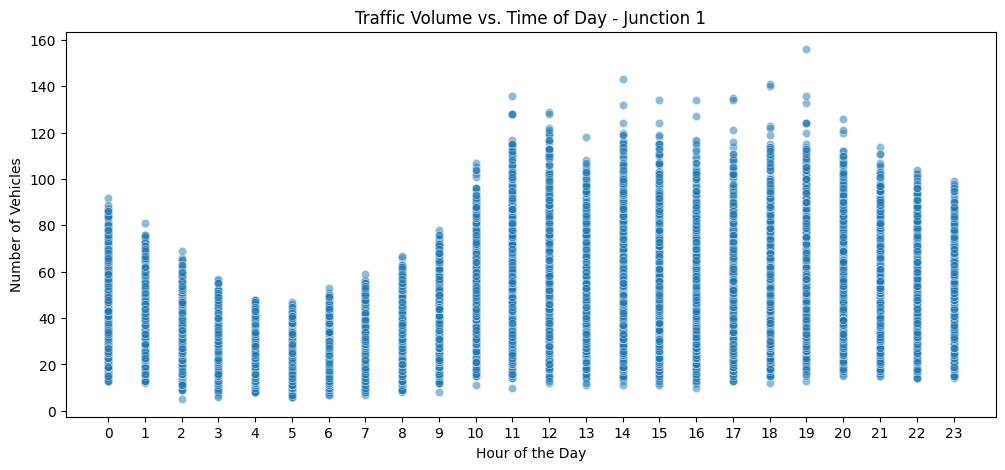

In [13]:
# Scatter plot for Vehicles vs. Hour of the Day
plt.figure(figsize=(12, 5))
sns.scatterplot(x=junction_df['Hour'], y=junction_df['Vehicles'], alpha=0.5)
plt.title(f"Traffic Volume vs. Time of Day - Junction {junction_id}")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Vehicles")
plt.xticks(range(0, 24))
plt.show()


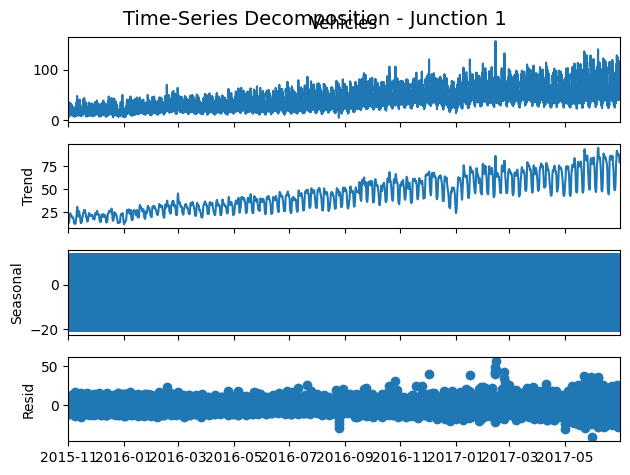

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set DateTime as index
junction_df.set_index('DateTime', inplace=True)

# Perform time-series decomposition
result = seasonal_decompose(junction_df['Vehicles'], model='additive', period=24)

# Plot decomposition
result.plot()
plt.suptitle(f"Time-Series Decomposition - Junction {junction_id}", fontsize=14)
plt.show()


<ipython-input-15-b97c36c5410b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=junction_df['Congestion_Level'], palette="coolwarm")


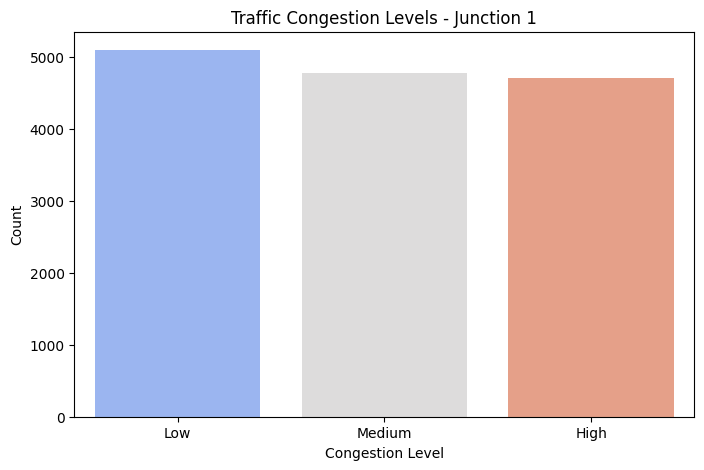

In [15]:
# Define congestion levels using quantiles
junction_df['Congestion_Level'] = pd.qcut(junction_df['Vehicles'], q=3, labels=['Low', 'Medium', 'High'])

# Countplot for congestion levels
plt.figure(figsize=(8,5))
sns.countplot(x=junction_df['Congestion_Level'], palette="coolwarm")
plt.title(f"Traffic Congestion Levels - Junction {junction_id}")
plt.xlabel("Congestion Level")
plt.ylabel("Count")
plt.show()


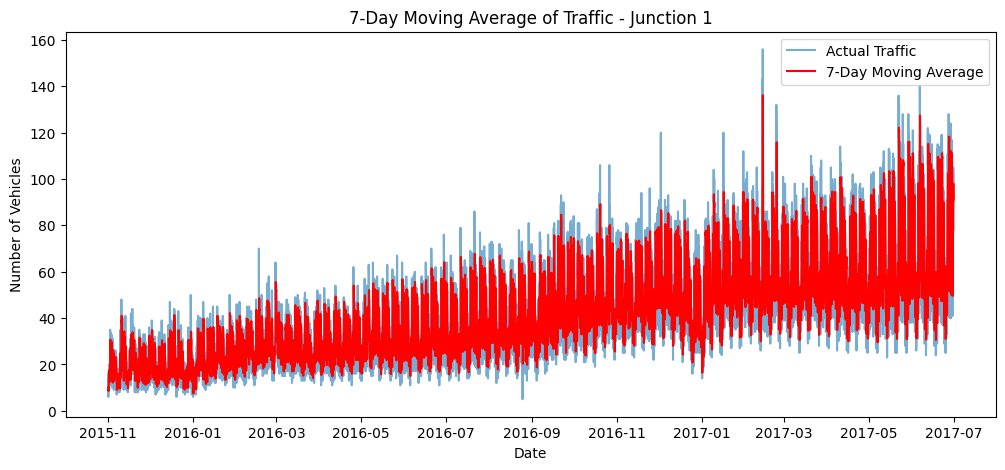

In [16]:
# Calculate moving average
junction_df['Moving_Avg_7'] = junction_df['Vehicles'].rolling(window=7).mean()

# Plot moving average
plt.figure(figsize=(12, 5))
sns.lineplot(x=junction_df.index, y=junction_df['Vehicles'], label="Actual Traffic", alpha=0.6)
sns.lineplot(x=junction_df.index, y=junction_df['Moving_Avg_7'], label="7-Day Moving Average", color='red')
plt.title(f"7-Day Moving Average of Traffic - Junction {junction_id}")
plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.show()


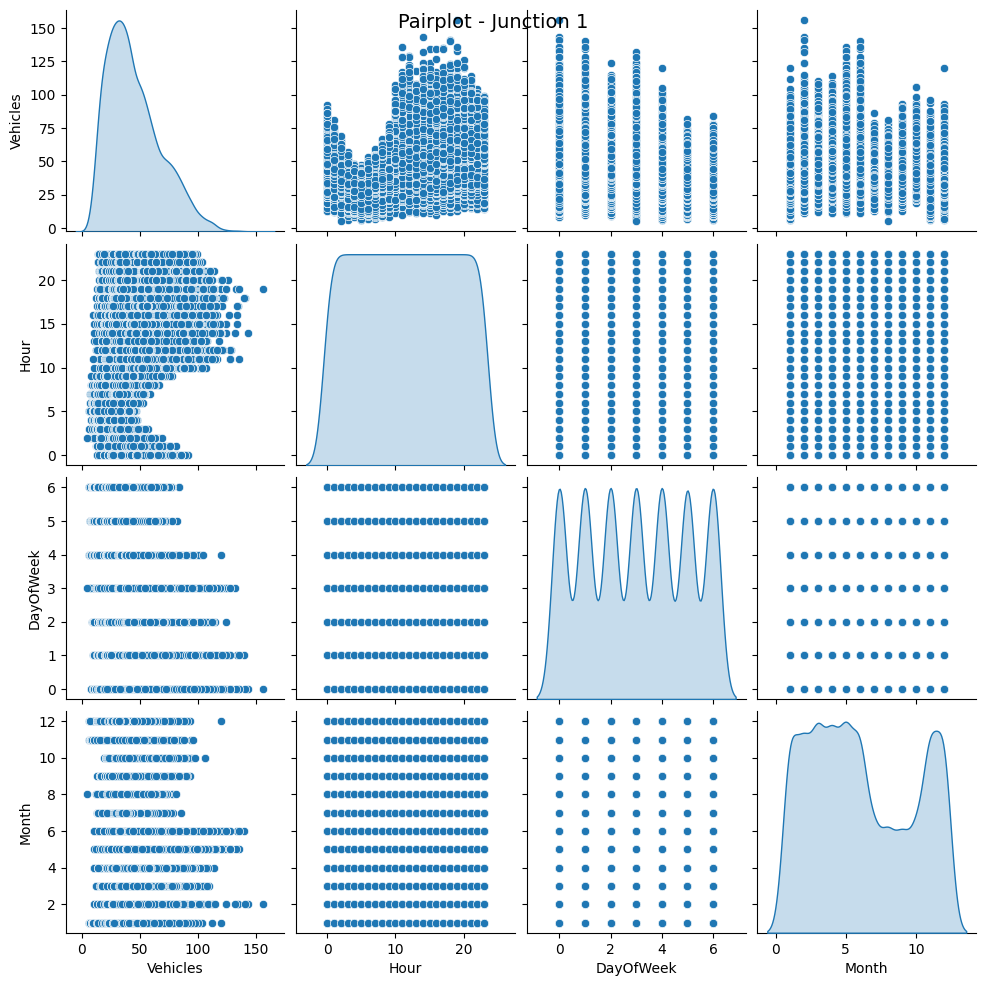

In [17]:
# Pairplot for traffic analysis
sns.pairplot(junction_df[['Vehicles', 'Hour', 'DayOfWeek', 'Month']], diag_kind="kde")
plt.suptitle(f"Pairplot - Junction {junction_id}", fontsize=14)
plt.show()


<ipython-input-18-4a1f4564beab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=junction_df['Month'], y=junction_df['Vehicles'], palette="viridis")


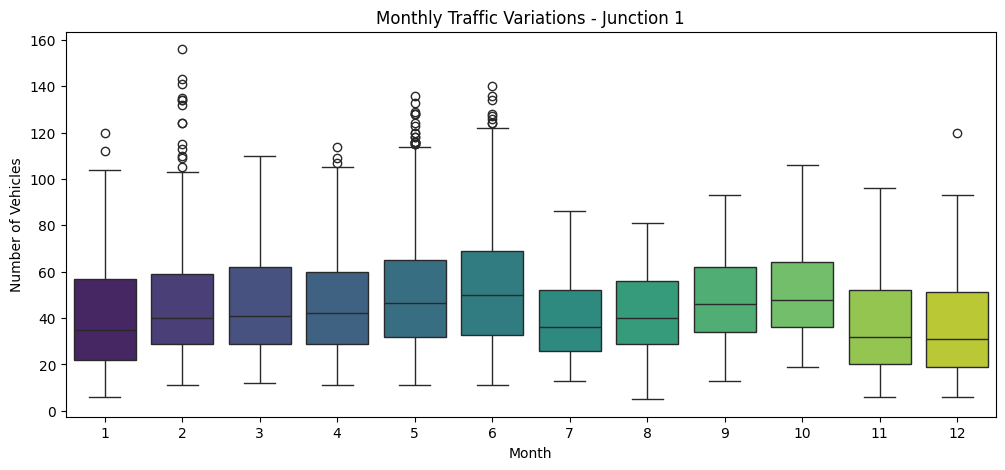

In [18]:
# Boxplot for seasonal traffic variations
plt.figure(figsize=(12, 5))
sns.boxplot(x=junction_df['Month'], y=junction_df['Vehicles'], palette="viridis")
plt.title(f"Monthly Traffic Variations - Junction {junction_id}")
plt.xlabel("Month")
plt.ylabel("Number of Vehicles")
plt.show()


In [21]:
import numpy as np

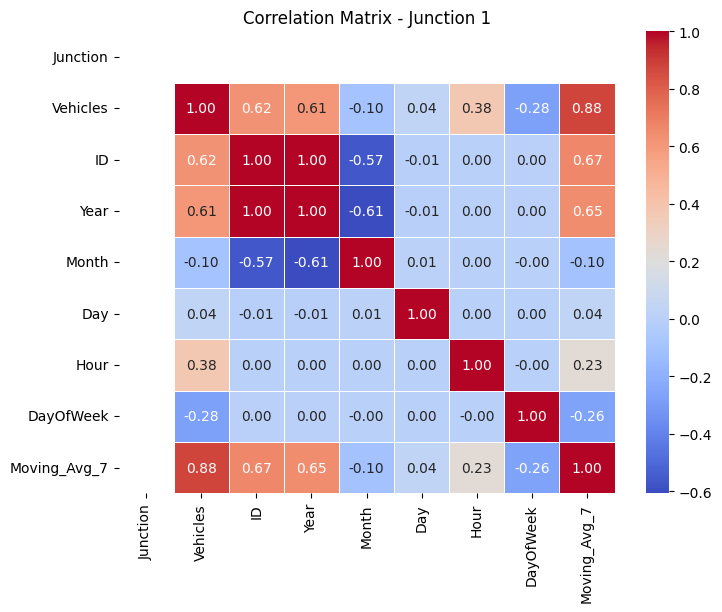

In [22]:
# Convert categorical columns to numeric (if any)
junction_df_numeric = junction_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = junction_df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Matrix - Junction {junction_id}")
plt.show()


In [23]:
def remove_unimportant_features(df, threshold=0.85):
    """
    Removes features that are highly correlated with each other
    or do not contribute significantly to traffic prediction.

    Args:
    df (pd.DataFrame): The dataframe containing traffic data.
    threshold (float): Correlation threshold for dropping features.

    Returns:
    pd.DataFrame: Dataframe with removed features.
    """

    # Select only numerical columns
    df_numeric = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = df_numeric.corr().abs()

    # Find upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with high correlation
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop unimportant features
    df_reduced = df.drop(columns=to_drop, axis=1)

    print(f"Removed Features: {to_drop}")

    return df_reduced

# Apply the function to remove unimportant features
junction_df = remove_unimportant_features(junction_df)


Removed Features: ['Year', 'Moving_Avg_7']


In [27]:
print(f"Remaining Features after feature selection: {junction_df.columns.tolist()}")


Remaining Features after feature selection: ['Junction', 'Vehicles', 'ID', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Congestion_Level']


#Junction 2

In [28]:
# Load a specific Junction file (Change junction number as needed)
junction_id = 2  # Change this value to any junction ID
junction_file = f"/content/junction_{junction_id}.csv"

# Load the file
junction_df = pd.read_csv(junction_file)

# Convert DateTime to datetime format
junction_df['DateTime'] = pd.to_datetime(junction_df['DateTime'])

# Display first few rows
junction_df.head()


DateTime  Junction  Vehicles           ID
0 2015-11-01 00:00:00         2         6  20151101002
1 2015-11-01 01:00:00         2         6  20151101012
2 2015-11-01 02:00:00         2         5  20151101022
3 2015-11-01 03:00:00         2         6  20151101032
4 2015-11-01 04:00:00         2         7  20151101042

In [29]:
# Check for missing values
print("Missing Values:\n", junction_df.isnull().sum())

# Basic statistical summary
junction_df.describe()


Missing Values:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


DateTime  Junction      Vehicles            ID
count                14592   14592.0  14592.000000  1.459200e+04
mean   2016-08-30 23:30:00       2.0     14.253221  2.016260e+10
min    2015-11-01 00:00:00       2.0      1.000000  2.015110e+10
25%    2016-03-31 23:45:00       2.0      9.000000  2.016038e+10
50%    2016-08-30 23:30:00       2.0     13.000000  2.016083e+10
75%    2017-01-29 23:15:00       2.0     17.000000  2.017013e+10
max    2017-06-30 23:00:00       2.0     48.000000  2.017063e+10
std                    NaN       0.0      7.401307  5.779594e+06

In [30]:
# Extracting time-based features
junction_df['Year'] = junction_df['DateTime'].dt.year
junction_df['Month'] = junction_df['DateTime'].dt.month
junction_df['Day'] = junction_df['DateTime'].dt.day
junction_df['Hour'] = junction_df['DateTime'].dt.hour
junction_df['DayOfWeek'] = junction_df['DateTime'].dt.dayofweek

# Display the updated dataframe
junction_df.head()


DateTime  Junction  Vehicles           ID  Year  Month  Day  \
0 2015-11-01 00:00:00         2         6  20151101002  2015     11    1   
1 2015-11-01 01:00:00         2         6  20151101012  2015     11    1   
2 2015-11-01 02:00:00         2         5  20151101022  2015     11    1   
3 2015-11-01 03:00:00         2         6  20151101032  2015     11    1   
4 2015-11-01 04:00:00         2         7  20151101042  2015     11    1   

   Hour  DayOfWeek  
0     0          6  
1     1          6  
2     2          6  
3     3          6  
4     4          6

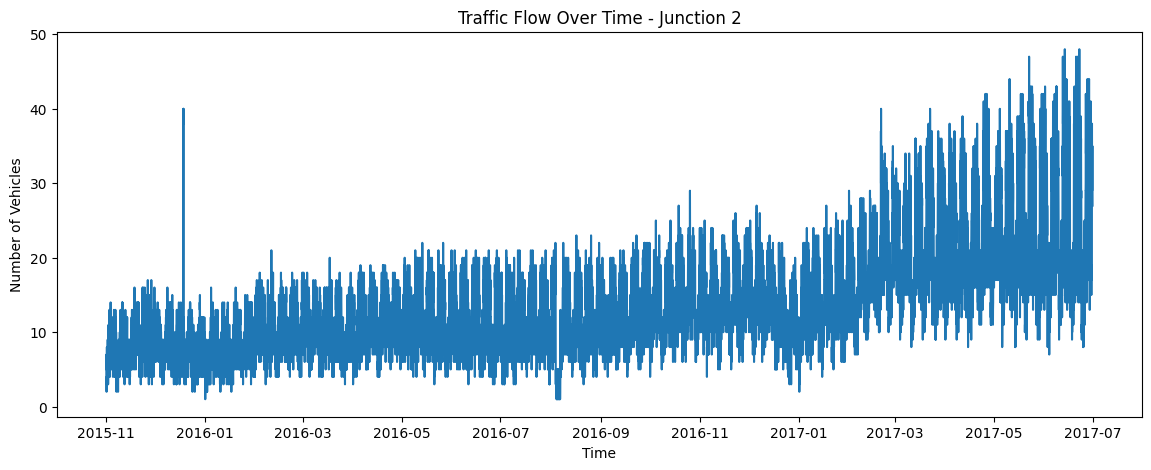

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of traffic over time
plt.figure(figsize=(14,5))
sns.lineplot(x=junction_df['DateTime'], y=junction_df['Vehicles'])
plt.title(f"Traffic Flow Over Time - Junction {junction_id}")
plt.xlabel("Time")
plt.ylabel("Number of Vehicles")
plt.show()


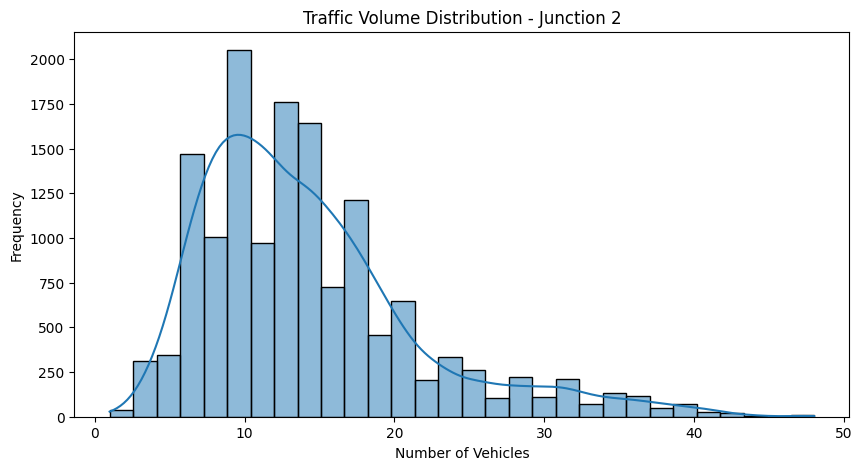

In [32]:
# Histogram for traffic volume distribution
plt.figure(figsize=(10,5))
sns.histplot(junction_df['Vehicles'], bins=30, kde=True)
plt.title(f"Traffic Volume Distribution - Junction {junction_id}")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")
plt.show()


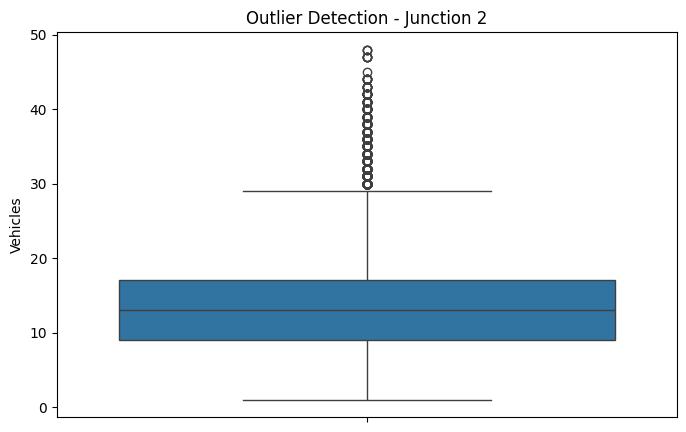

In [33]:
# Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(y=junction_df['Vehicles'])
plt.title(f"Outlier Detection - Junction {junction_id}")
plt.show()


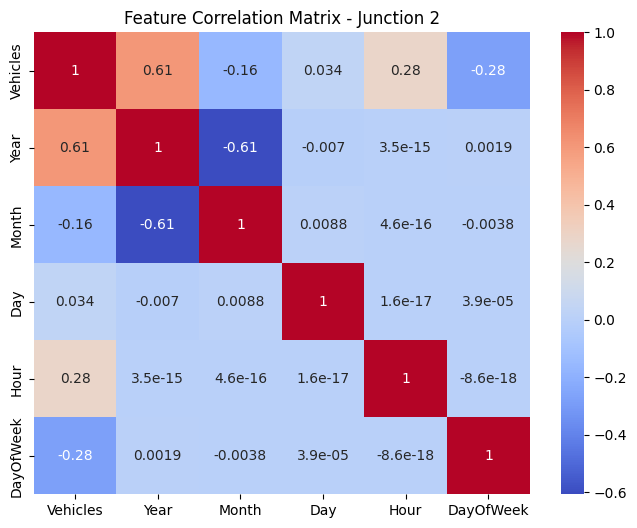

In [34]:
# Compute correlation matrix
corr_matrix = junction_df[['Vehicles', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].corr()

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title(f"Feature Correlation Matrix - Junction {junction_id}")
plt.show()


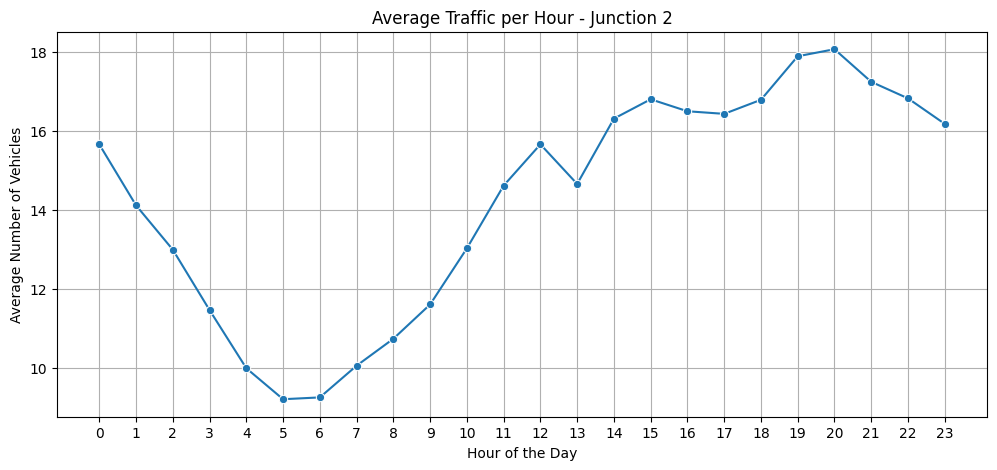

In [35]:
# Calculate the average number of vehicles for each hour
hourly_avg_traffic = junction_df.groupby('Hour')['Vehicles'].mean()

# Plot the results
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_avg_traffic.index, y=hourly_avg_traffic.values, marker="o")
plt.title(f"Average Traffic per Hour - Junction {junction_id}")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



<ipython-input-36-f551367cb564>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_avg_traffic.index, y=daily_avg_traffic.values, palette="viridis")


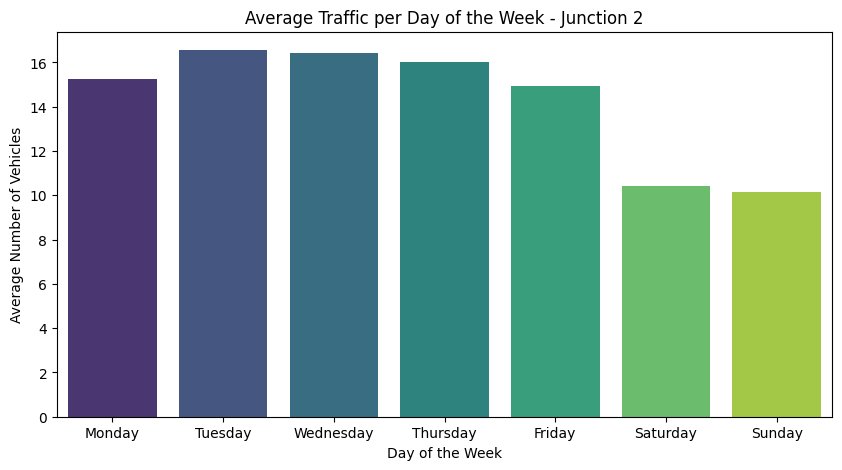

In [36]:
# Map days of the week for better readability
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Calculate average vehicles per day of the week
daily_avg_traffic = junction_df.groupby('DayOfWeek')['Vehicles'].mean()
daily_avg_traffic.index = daily_avg_traffic.index.map(days_mapping)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_avg_traffic.index, y=daily_avg_traffic.values, palette="viridis")
plt.title(f"Average Traffic per Day of the Week - Junction {junction_id}")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Vehicles")
plt.show()


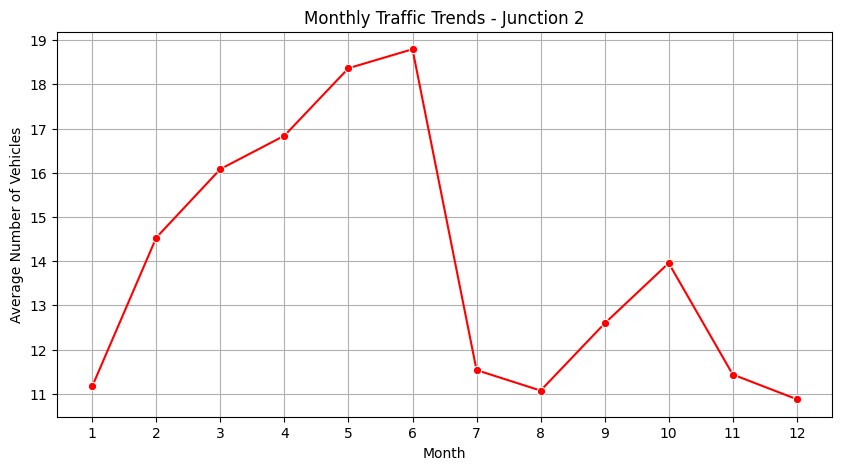

In [37]:
# Group data by month
monthly_traffic = junction_df.groupby('Month')['Vehicles'].mean()

# Plot the results
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_traffic.index, y=monthly_traffic.values, marker="o", color="red")
plt.title(f"Monthly Traffic Trends - Junction {junction_id}")
plt.xlabel("Month")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


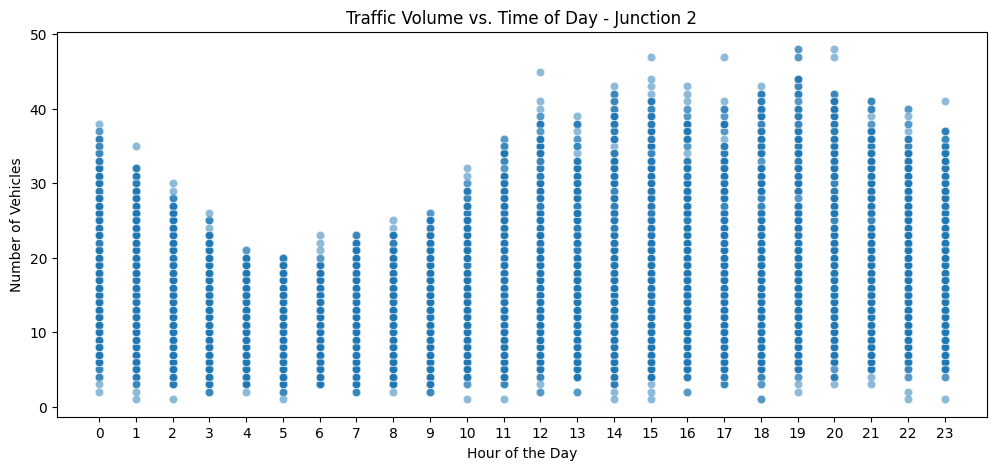

In [38]:
# Scatter plot for Vehicles vs. Hour of the Day
plt.figure(figsize=(12, 5))
sns.scatterplot(x=junction_df['Hour'], y=junction_df['Vehicles'], alpha=0.5)
plt.title(f"Traffic Volume vs. Time of Day - Junction {junction_id}")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Vehicles")
plt.xticks(range(0, 24))
plt.show()


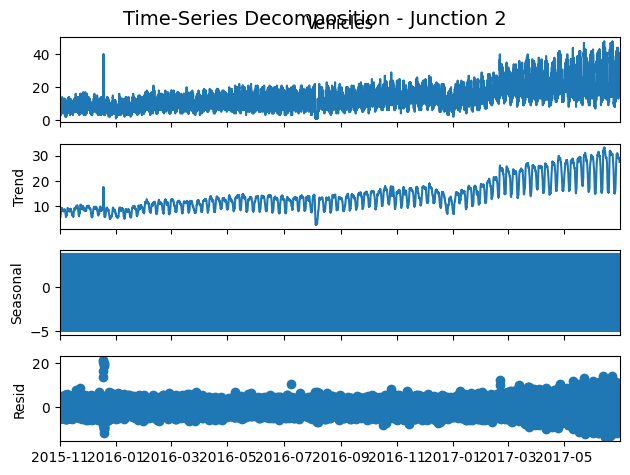

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set DateTime as index
junction_df.set_index('DateTime', inplace=True)

# Perform time-series decomposition
result = seasonal_decompose(junction_df['Vehicles'], model='additive', period=24)

# Plot decomposition
result.plot()
plt.suptitle(f"Time-Series Decomposition - Junction {junction_id}", fontsize=14)
plt.show()


<ipython-input-40-b97c36c5410b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=junction_df['Congestion_Level'], palette="coolwarm")


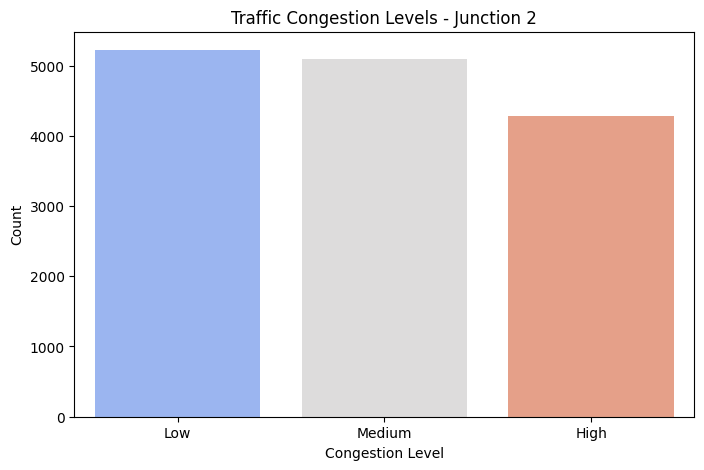

In [40]:
# Define congestion levels using quantiles
junction_df['Congestion_Level'] = pd.qcut(junction_df['Vehicles'], q=3, labels=['Low', 'Medium', 'High'])

# Countplot for congestion levels
plt.figure(figsize=(8,5))
sns.countplot(x=junction_df['Congestion_Level'], palette="coolwarm")
plt.title(f"Traffic Congestion Levels - Junction {junction_id}")
plt.xlabel("Congestion Level")
plt.ylabel("Count")
plt.show()


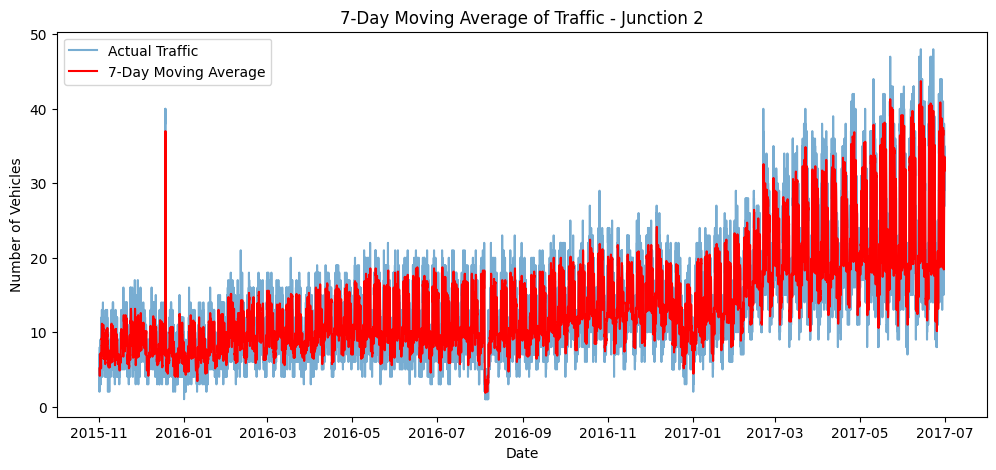

In [41]:
# Calculate moving average
junction_df['Moving_Avg_7'] = junction_df['Vehicles'].rolling(window=7).mean()

# Plot moving average
plt.figure(figsize=(12, 5))
sns.lineplot(x=junction_df.index, y=junction_df['Vehicles'], label="Actual Traffic", alpha=0.6)
sns.lineplot(x=junction_df.index, y=junction_df['Moving_Avg_7'], label="7-Day Moving Average", color='red')
plt.title(f"7-Day Moving Average of Traffic - Junction {junction_id}")
plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.show()


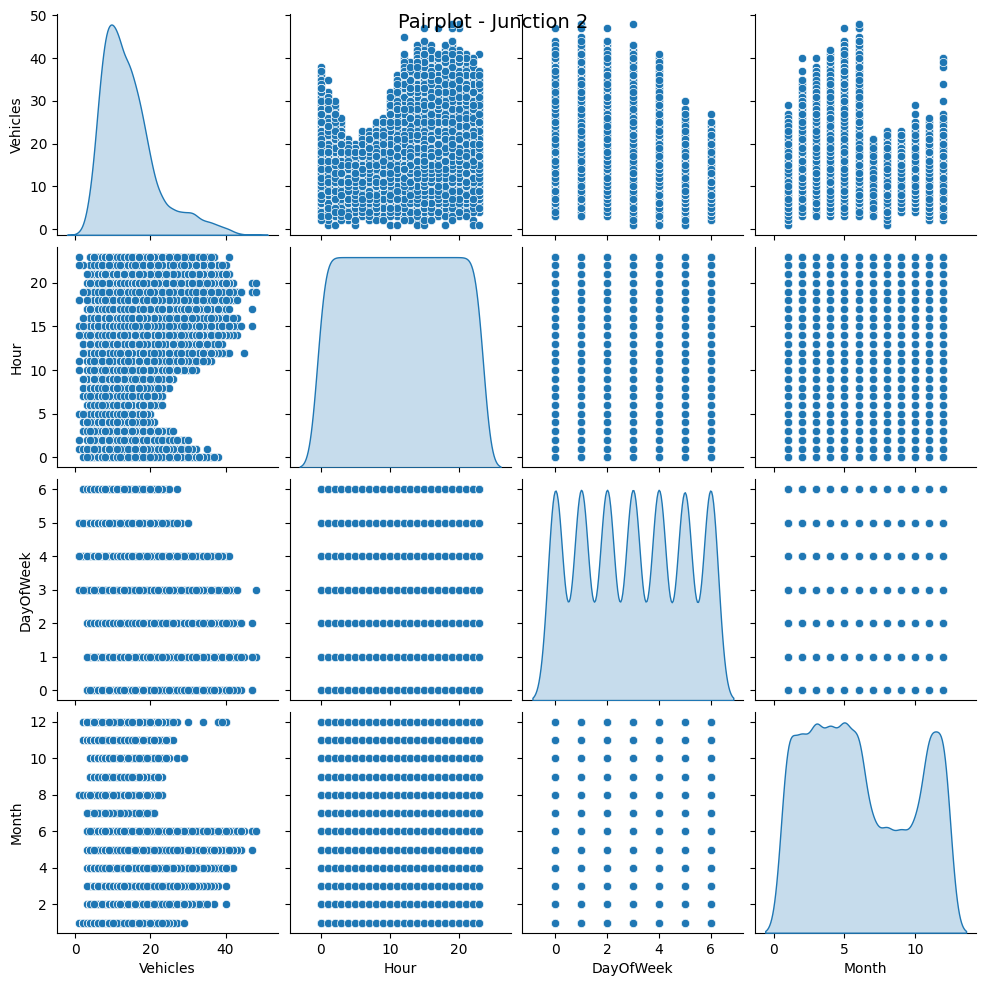

In [42]:
# Pairplot for traffic analysis
sns.pairplot(junction_df[['Vehicles', 'Hour', 'DayOfWeek', 'Month']], diag_kind="kde")
plt.suptitle(f"Pairplot - Junction {junction_id}", fontsize=14)
plt.show()


<ipython-input-43-4a1f4564beab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=junction_df['Month'], y=junction_df['Vehicles'], palette="viridis")


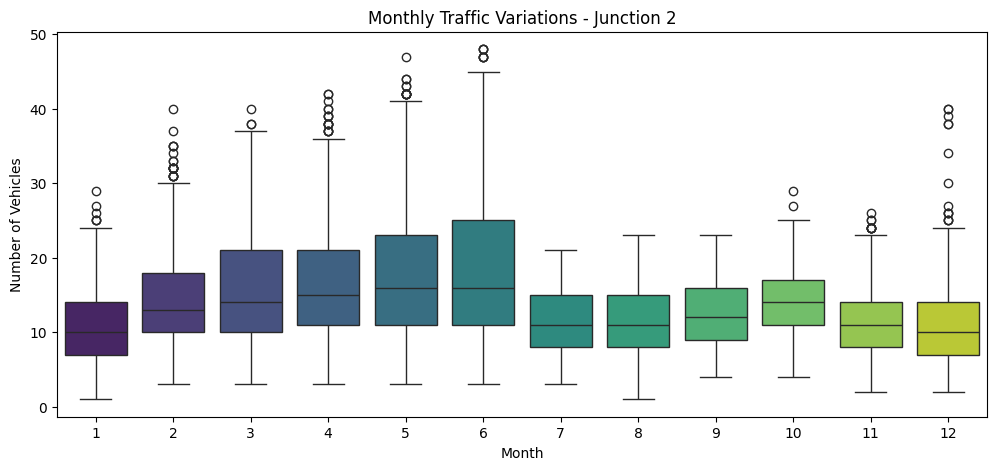

In [43]:
# Boxplot for seasonal traffic variations
plt.figure(figsize=(12, 5))
sns.boxplot(x=junction_df['Month'], y=junction_df['Vehicles'], palette="viridis")
plt.title(f"Monthly Traffic Variations - Junction {junction_id}")
plt.xlabel("Month")
plt.ylabel("Number of Vehicles")
plt.show()


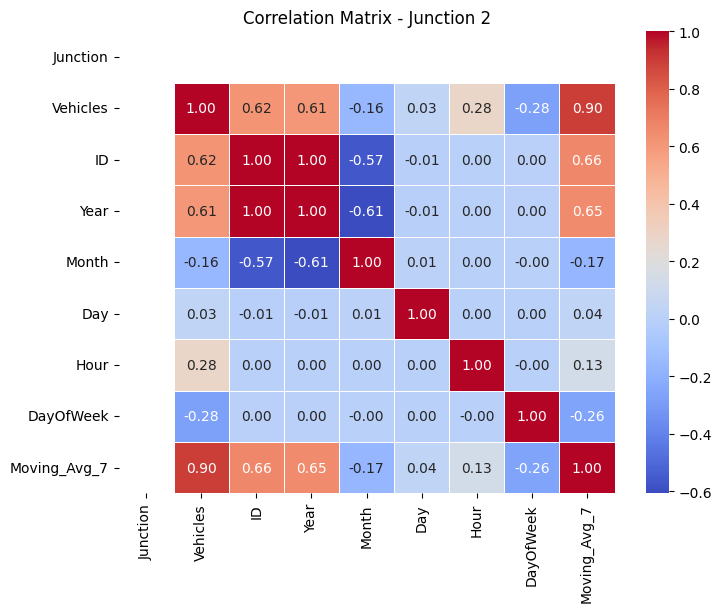

In [44]:
# Convert categorical columns to numeric (if any)
junction_df_numeric = junction_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = junction_df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Matrix - Junction {junction_id}")
plt.show()


In [45]:
def remove_unimportant_features(df, threshold=0.85):
    """
    Removes features that are highly correlated with each other
    or do not contribute significantly to traffic prediction.

    Args:
    df (pd.DataFrame): The dataframe containing traffic data.
    threshold (float): Correlation threshold for dropping features.

    Returns:
    pd.DataFrame: Dataframe with removed features.
    """

    # Select only numerical columns
    df_numeric = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = df_numeric.corr().abs()

    # Find upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with high correlation
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop unimportant features
    df_reduced = df.drop(columns=to_drop, axis=1)

    print(f"Removed Features: {to_drop}")

    return df_reduced

# Apply the function to remove unimportant features
junction_df = remove_unimportant_features(junction_df)


Removed Features: ['Year', 'Moving_Avg_7']


In [46]:
print(f"Remaining Features after feature selection: {junction_df.columns.tolist()}")


Remaining Features after feature selection: ['Junction', 'Vehicles', 'ID', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Congestion_Level']


#Junction 3

In [48]:
# Load a specific Junction file (Change junction number as needed)
junction_id = 3  # Change this value to any junction ID
junction_file = f"/content/junction_{junction_id}.csv"

# Load the file
junction_df = pd.read_csv(junction_file)

# Convert DateTime to datetime format
junction_df['DateTime'] = pd.to_datetime(junction_df['DateTime'])

# Display first few rows
junction_df.head()


DateTime  Junction  Vehicles           ID
0 2015-11-01 00:00:00         3         9  20151101003
1 2015-11-01 01:00:00         3         7  20151101013
2 2015-11-01 02:00:00         3         5  20151101023
3 2015-11-01 03:00:00         3         1  20151101033
4 2015-11-01 04:00:00         3         2  20151101043

In [49]:
# Check for missing values
print("Missing Values:\n", junction_df.isnull().sum())

# Basic statistical summary
junction_df.describe()


Missing Values:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


DateTime  Junction      Vehicles            ID
count                14592   14592.0  14592.000000  1.459200e+04
mean   2016-08-30 23:30:00       3.0     13.694010  2.016260e+10
min    2015-11-01 00:00:00       3.0      1.000000  2.015110e+10
25%    2016-03-31 23:45:00       3.0      7.000000  2.016038e+10
50%    2016-08-30 23:30:00       3.0     11.000000  2.016083e+10
75%    2017-01-29 23:15:00       3.0     18.000000  2.017013e+10
max    2017-06-30 23:00:00       3.0    180.000000  2.017063e+10
std                    NaN       0.0     10.436005  5.779594e+06

In [50]:
# Extracting time-based features
junction_df['Year'] = junction_df['DateTime'].dt.year
junction_df['Month'] = junction_df['DateTime'].dt.month
junction_df['Day'] = junction_df['DateTime'].dt.day
junction_df['Hour'] = junction_df['DateTime'].dt.hour
junction_df['DayOfWeek'] = junction_df['DateTime'].dt.dayofweek

# Display the updated dataframe
junction_df.head()


DateTime  Junction  Vehicles           ID  Year  Month  Day  \
0 2015-11-01 00:00:00         3         9  20151101003  2015     11    1   
1 2015-11-01 01:00:00         3         7  20151101013  2015     11    1   
2 2015-11-01 02:00:00         3         5  20151101023  2015     11    1   
3 2015-11-01 03:00:00         3         1  20151101033  2015     11    1   
4 2015-11-01 04:00:00         3         2  20151101043  2015     11    1   

   Hour  DayOfWeek  
0     0          6  
1     1          6  
2     2          6  
3     3          6  
4     4          6

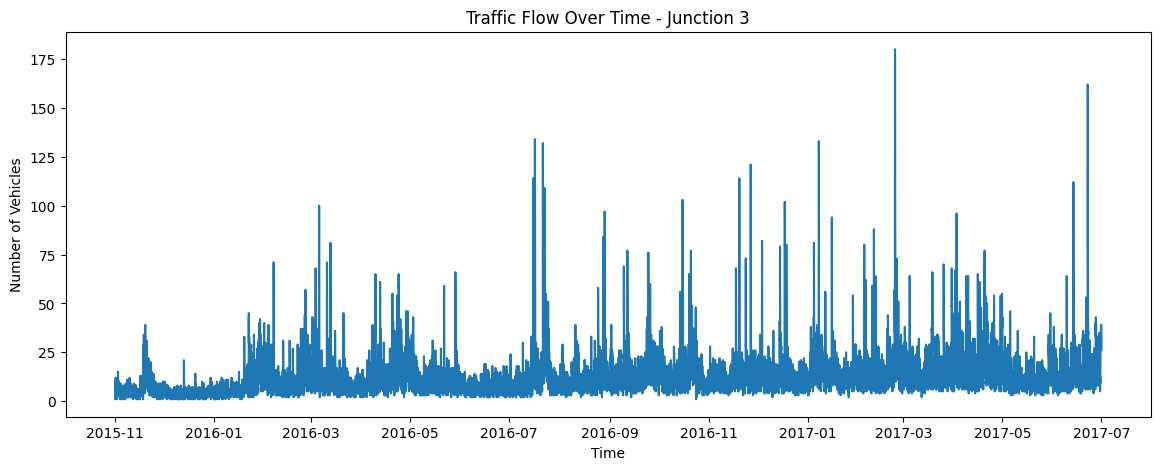

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of traffic over time
plt.figure(figsize=(14,5))
sns.lineplot(x=junction_df['DateTime'], y=junction_df['Vehicles'])
plt.title(f"Traffic Flow Over Time - Junction {junction_id}")
plt.xlabel("Time")
plt.ylabel("Number of Vehicles")
plt.show()


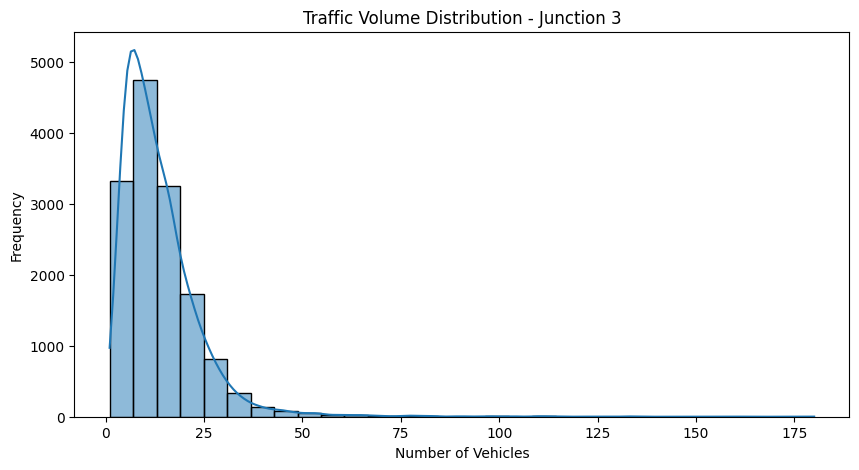

In [52]:
# Histogram for traffic volume distribution
plt.figure(figsize=(10,5))
sns.histplot(junction_df['Vehicles'], bins=30, kde=True)
plt.title(f"Traffic Volume Distribution - Junction {junction_id}")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")
plt.show()


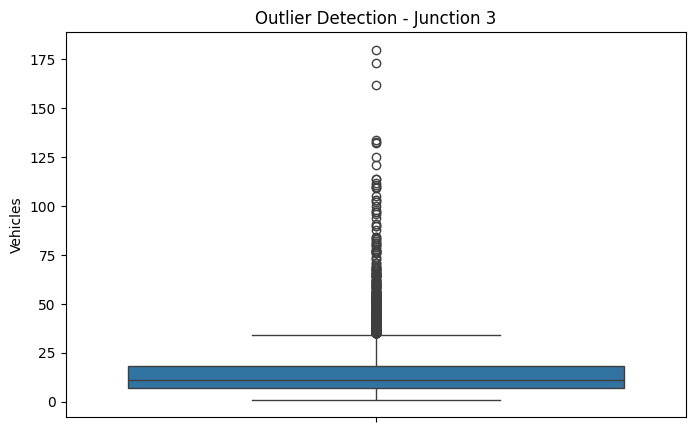

In [53]:
# Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(y=junction_df['Vehicles'])
plt.title(f"Outlier Detection - Junction {junction_id}")
plt.show()


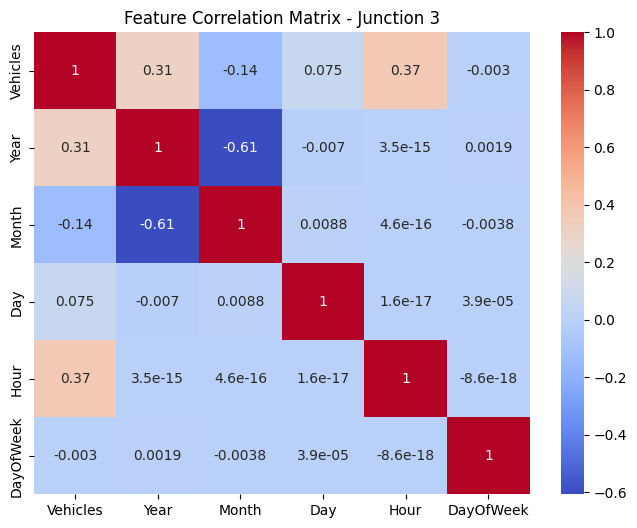

In [54]:
# Compute correlation matrix
corr_matrix = junction_df[['Vehicles', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].corr()

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title(f"Feature Correlation Matrix - Junction {junction_id}")
plt.show()


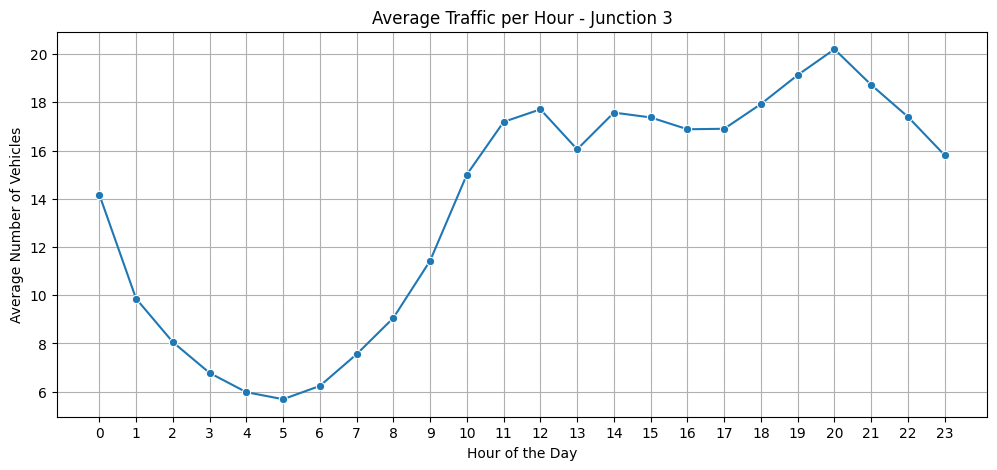

In [55]:
# Calculate the average number of vehicles for each hour
hourly_avg_traffic = junction_df.groupby('Hour')['Vehicles'].mean()

# Plot the results
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_avg_traffic.index, y=hourly_avg_traffic.values, marker="o")
plt.title(f"Average Traffic per Hour - Junction {junction_id}")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



<ipython-input-56-f551367cb564>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_avg_traffic.index, y=daily_avg_traffic.values, palette="viridis")


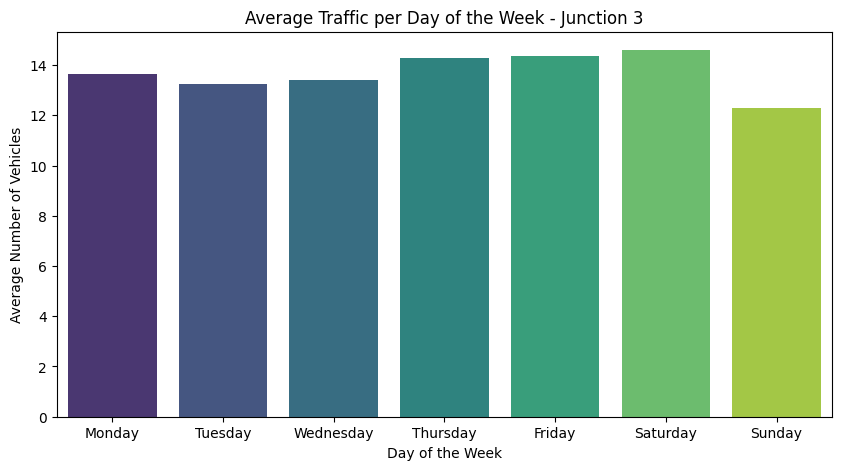

In [56]:
# Map days of the week for better readability
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Calculate average vehicles per day of the week
daily_avg_traffic = junction_df.groupby('DayOfWeek')['Vehicles'].mean()
daily_avg_traffic.index = daily_avg_traffic.index.map(days_mapping)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_avg_traffic.index, y=daily_avg_traffic.values, palette="viridis")
plt.title(f"Average Traffic per Day of the Week - Junction {junction_id}")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Vehicles")
plt.show()


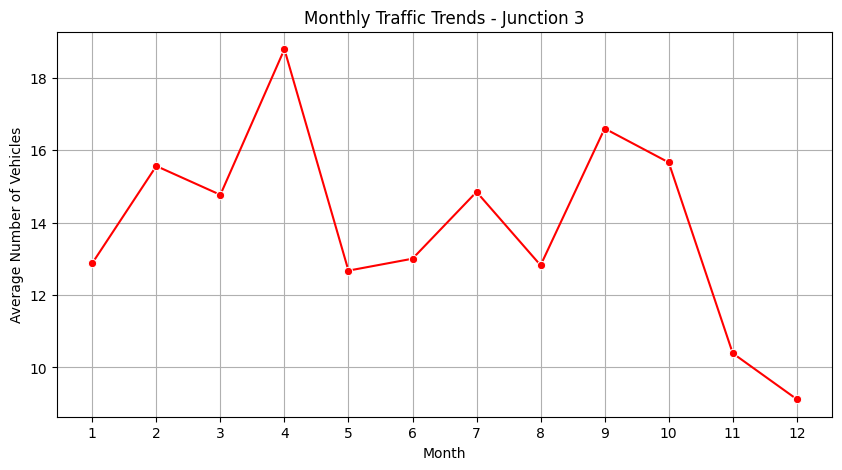

In [57]:
# Group data by month
monthly_traffic = junction_df.groupby('Month')['Vehicles'].mean()

# Plot the results
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_traffic.index, y=monthly_traffic.values, marker="o", color="red")
plt.title(f"Monthly Traffic Trends - Junction {junction_id}")
plt.xlabel("Month")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


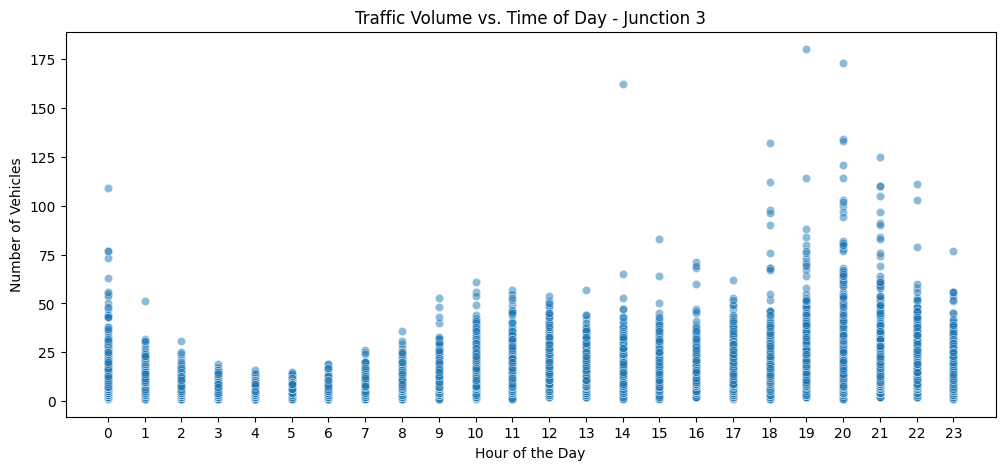

In [58]:
# Scatter plot for Vehicles vs. Hour of the Day
plt.figure(figsize=(12, 5))
sns.scatterplot(x=junction_df['Hour'], y=junction_df['Vehicles'], alpha=0.5)
plt.title(f"Traffic Volume vs. Time of Day - Junction {junction_id}")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Vehicles")
plt.xticks(range(0, 24))
plt.show()


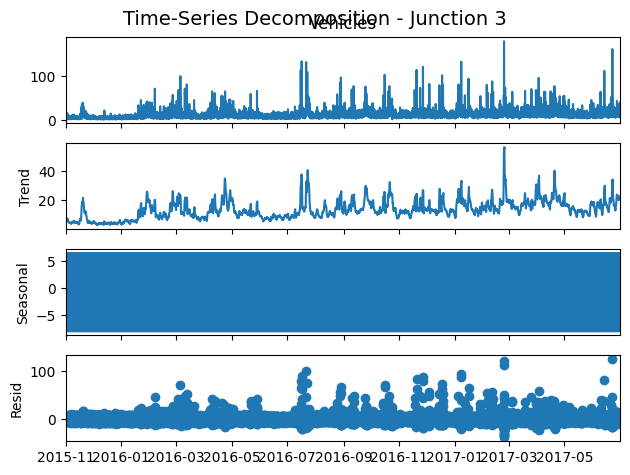

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set DateTime as index
junction_df.set_index('DateTime', inplace=True)

# Perform time-series decomposition
result = seasonal_decompose(junction_df['Vehicles'], model='additive', period=24)

# Plot decomposition
result.plot()
plt.suptitle(f"Time-Series Decomposition - Junction {junction_id}", fontsize=14)
plt.show()


<ipython-input-60-b97c36c5410b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=junction_df['Congestion_Level'], palette="coolwarm")


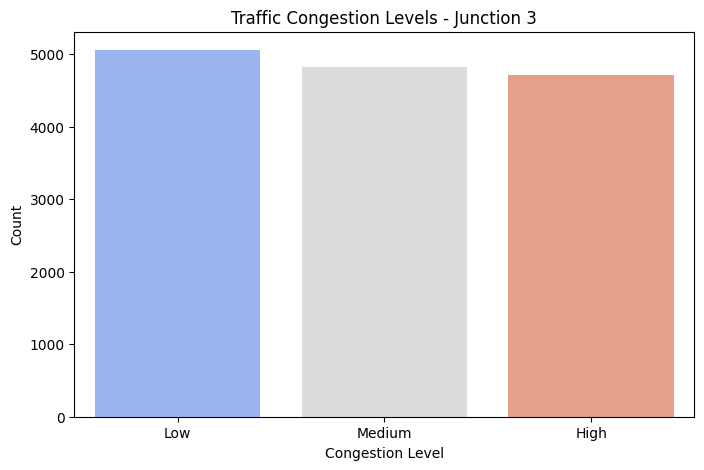

In [60]:
# Define congestion levels using quantiles
junction_df['Congestion_Level'] = pd.qcut(junction_df['Vehicles'], q=3, labels=['Low', 'Medium', 'High'])

# Countplot for congestion levels
plt.figure(figsize=(8,5))
sns.countplot(x=junction_df['Congestion_Level'], palette="coolwarm")
plt.title(f"Traffic Congestion Levels - Junction {junction_id}")
plt.xlabel("Congestion Level")
plt.ylabel("Count")
plt.show()


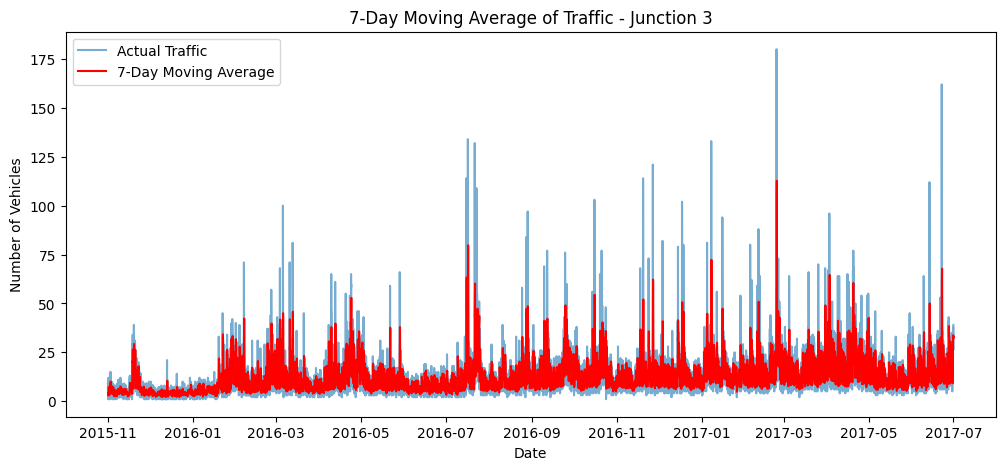

In [61]:
# Calculate moving average
junction_df['Moving_Avg_7'] = junction_df['Vehicles'].rolling(window=7).mean()

# Plot moving average
plt.figure(figsize=(12, 5))
sns.lineplot(x=junction_df.index, y=junction_df['Vehicles'], label="Actual Traffic", alpha=0.6)
sns.lineplot(x=junction_df.index, y=junction_df['Moving_Avg_7'], label="7-Day Moving Average", color='red')
plt.title(f"7-Day Moving Average of Traffic - Junction {junction_id}")
plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.show()


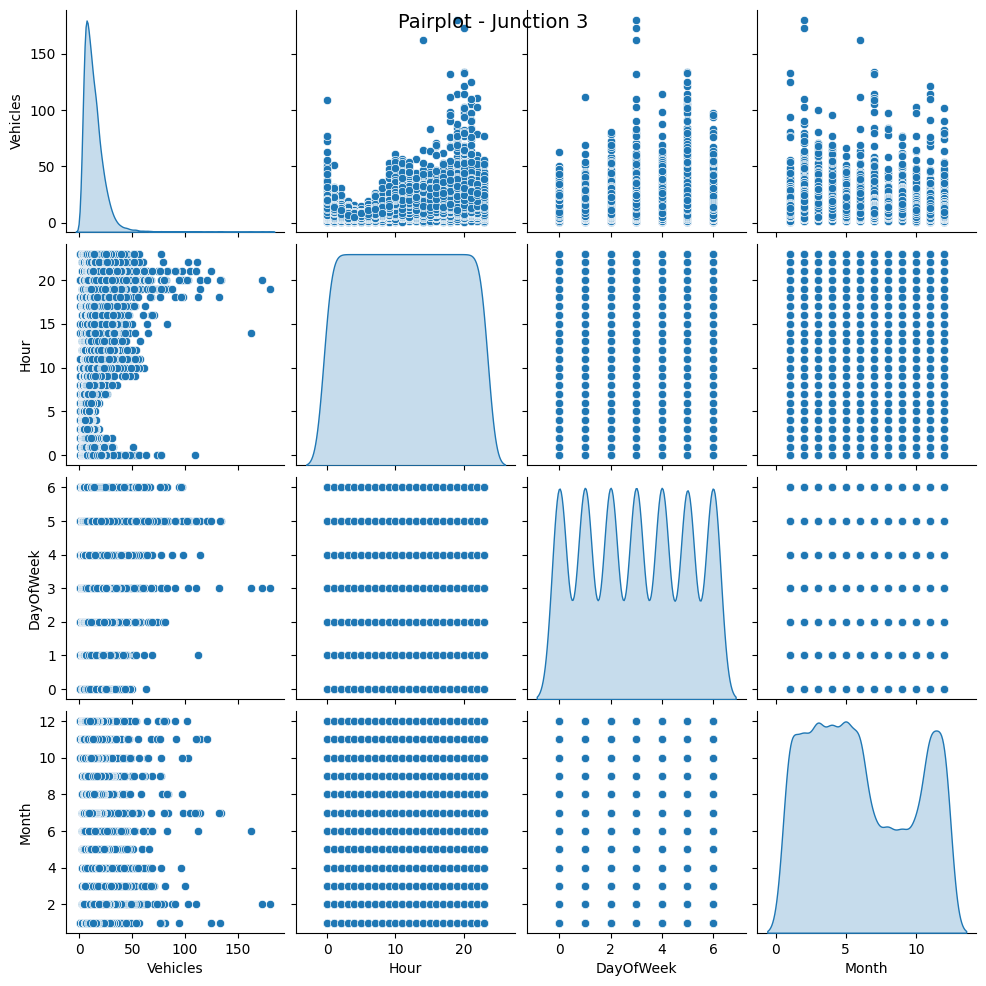

In [62]:
# Pairplot for traffic analysis
sns.pairplot(junction_df[['Vehicles', 'Hour', 'DayOfWeek', 'Month']], diag_kind="kde")
plt.suptitle(f"Pairplot - Junction {junction_id}", fontsize=14)
plt.show()


<ipython-input-63-4a1f4564beab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=junction_df['Month'], y=junction_df['Vehicles'], palette="viridis")


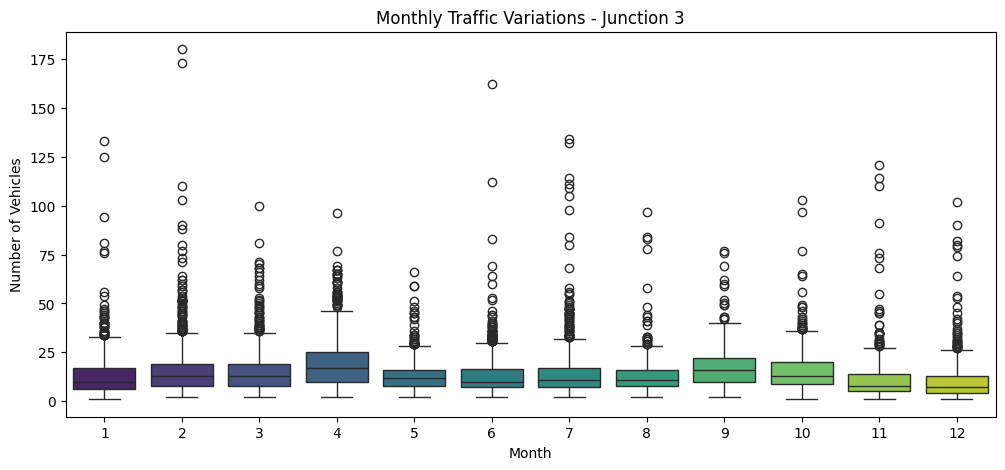

In [63]:
# Boxplot for seasonal traffic variations
plt.figure(figsize=(12, 5))
sns.boxplot(x=junction_df['Month'], y=junction_df['Vehicles'], palette="viridis")
plt.title(f"Monthly Traffic Variations - Junction {junction_id}")
plt.xlabel("Month")
plt.ylabel("Number of Vehicles")
plt.show()


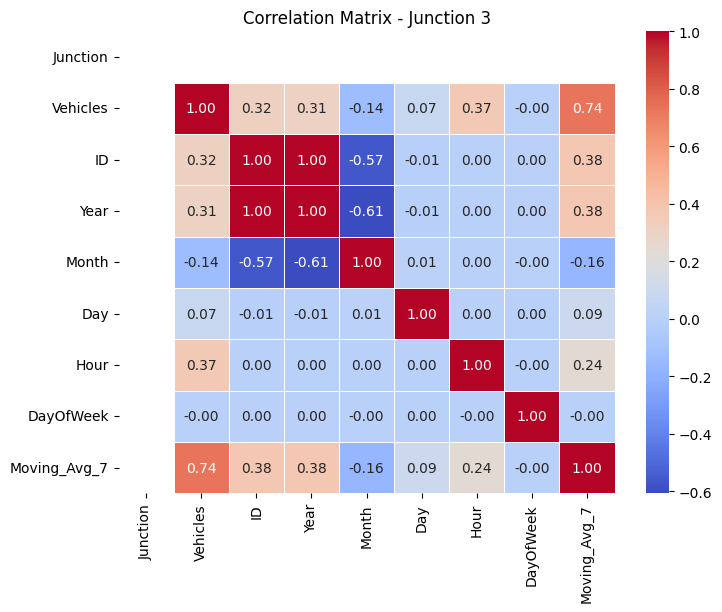

In [65]:
# Convert categorical columns to numeric (if any)
junction_df_numeric = junction_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = junction_df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Matrix - Junction {junction_id}")
plt.show()


In [66]:
def remove_unimportant_features(df, threshold=0.85):
    """
    Removes features that are highly correlated with each other
    or do not contribute significantly to traffic prediction.

    Args:
    df (pd.DataFrame): The dataframe containing traffic data.
    threshold (float): Correlation threshold for dropping features.

    Returns:
    pd.DataFrame: Dataframe with removed features.
    """

    # Select only numerical columns
    df_numeric = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = df_numeric.corr().abs()

    # Find upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with high correlation
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop unimportant features
    df_reduced = df.drop(columns=to_drop, axis=1)

    print(f"Removed Features: {to_drop}")

    return df_reduced

# Apply the function to remove unimportant features
junction_df = remove_unimportant_features(junction_df)


Removed Features: ['Year']


In [67]:
print(f"Remaining Features after feature selection: {junction_df.columns.tolist()}")


Remaining Features after feature selection: ['Junction', 'Vehicles', 'ID', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Congestion_Level', 'Moving_Avg_7']


# Junction 4

In [71]:
# Load a specific Junction file (Change junction number as needed)
junction_id = 4  # Change this value to any junction ID
junction_file = f"/content/junction_{junction_id}.csv"

# Load the file
junction_df = pd.read_csv(junction_file)

# Convert DateTime to datetime format
junction_df['DateTime'] = pd.to_datetime(junction_df['DateTime'])

# Display first few rows
junction_df.head()
junction_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  4344 non-null   datetime64[ns]
 1   Junction  4344 non-null   int64         
 2   Vehicles  4344 non-null   int64         
 3   ID        4344 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 135.9 KB


In [72]:
# Check for missing values
print("Missing Values:\n", junction_df.isnull().sum())

# Basic statistical summary
junction_df.describe()


Missing Values:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


DateTime  Junction     Vehicles            ID
count                 4344    4344.0  4344.000000  4.344000e+03
mean   2017-04-01 11:30:00       4.0     7.251611  2.017037e+10
min    2017-01-01 00:00:00       4.0     1.000000  2.017010e+10
25%    2017-02-15 05:45:00       4.0     5.000000  2.017022e+10
50%    2017-04-01 11:30:00       4.0     7.000000  2.017040e+10
75%    2017-05-16 17:15:00       4.0     9.000000  2.017052e+10
max    2017-06-30 23:00:00       4.0    36.000000  2.017063e+10
std                    NaN       0.0     3.521455  1.712987e+05

In [73]:
# Extracting time-based features
junction_df['Year'] = junction_df['DateTime'].dt.year
junction_df['Month'] = junction_df['DateTime'].dt.month
junction_df['Day'] = junction_df['DateTime'].dt.day
junction_df['Hour'] = junction_df['DateTime'].dt.hour
junction_df['DayOfWeek'] = junction_df['DateTime'].dt.dayofweek

# Display the updated dataframe
junction_df.head()


DateTime  Junction  Vehicles           ID  Year  Month  Day  \
0 2017-01-01 00:00:00         4         3  20170101004  2017      1    1   
1 2017-01-01 01:00:00         4         1  20170101014  2017      1    1   
2 2017-01-01 02:00:00         4         4  20170101024  2017      1    1   
3 2017-01-01 03:00:00         4         4  20170101034  2017      1    1   
4 2017-01-01 04:00:00         4         2  20170101044  2017      1    1   

   Hour  DayOfWeek  
0     0          6  
1     1          6  
2     2          6  
3     3          6  
4     4          6

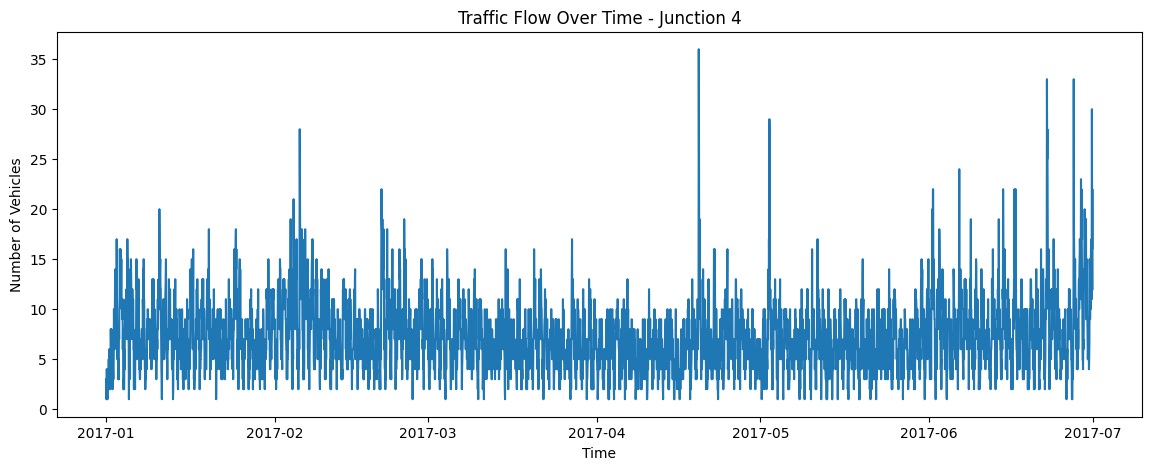

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of traffic over time
plt.figure(figsize=(14,5))
sns.lineplot(x=junction_df['DateTime'], y=junction_df['Vehicles'])
plt.title(f"Traffic Flow Over Time - Junction {junction_id}")
plt.xlabel("Time")
plt.ylabel("Number of Vehicles")
plt.show()


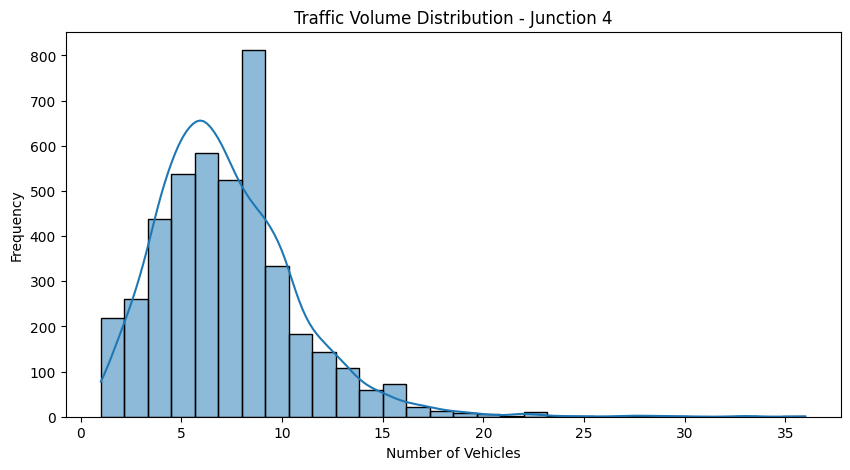

In [75]:
# Histogram for traffic volume distribution
plt.figure(figsize=(10,5))
sns.histplot(junction_df['Vehicles'], bins=30, kde=True)
plt.title(f"Traffic Volume Distribution - Junction {junction_id}")
plt.xlabel("Number of Vehicles")
plt.ylabel("Frequency")
plt.show()


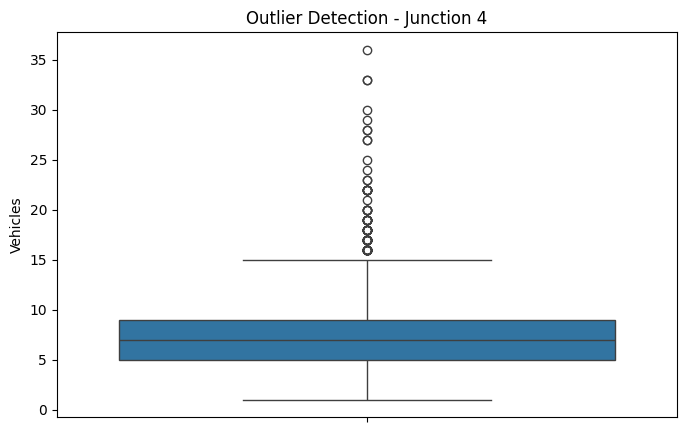

In [76]:
# Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(y=junction_df['Vehicles'])
plt.title(f"Outlier Detection - Junction {junction_id}")
plt.show()


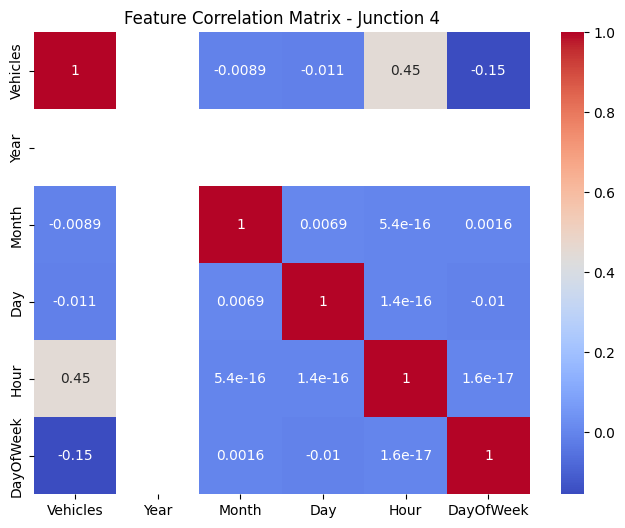

In [77]:
# Compute correlation matrix
corr_matrix = junction_df[['Vehicles', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].corr()

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title(f"Feature Correlation Matrix - Junction {junction_id}")
plt.show()


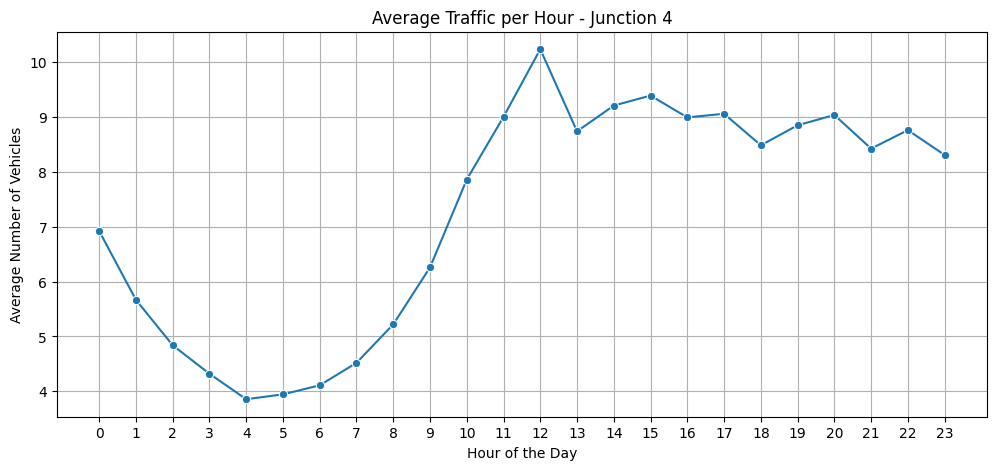

In [78]:
# Calculate the average number of vehicles for each hour
hourly_avg_traffic = junction_df.groupby('Hour')['Vehicles'].mean()

# Plot the results
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_avg_traffic.index, y=hourly_avg_traffic.values, marker="o")
plt.title(f"Average Traffic per Hour - Junction {junction_id}")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



<ipython-input-79-f551367cb564>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_avg_traffic.index, y=daily_avg_traffic.values, palette="viridis")


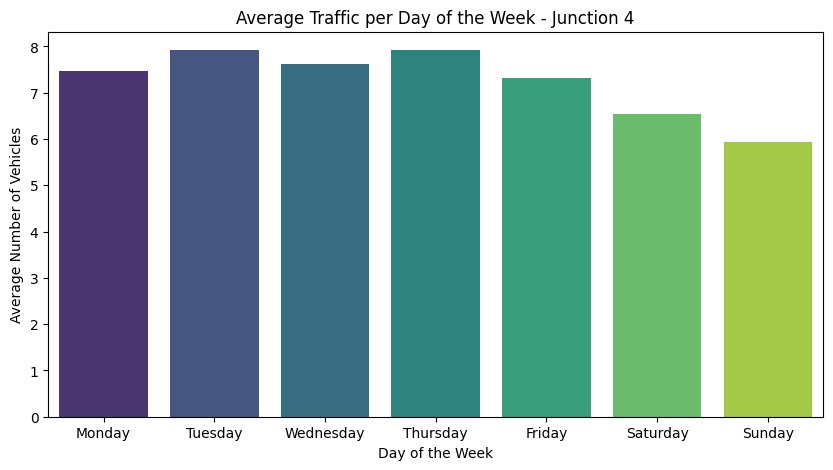

In [79]:
# Map days of the week for better readability
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Calculate average vehicles per day of the week
daily_avg_traffic = junction_df.groupby('DayOfWeek')['Vehicles'].mean()
daily_avg_traffic.index = daily_avg_traffic.index.map(days_mapping)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_avg_traffic.index, y=daily_avg_traffic.values, palette="viridis")
plt.title(f"Average Traffic per Day of the Week - Junction {junction_id}")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Vehicles")
plt.show()


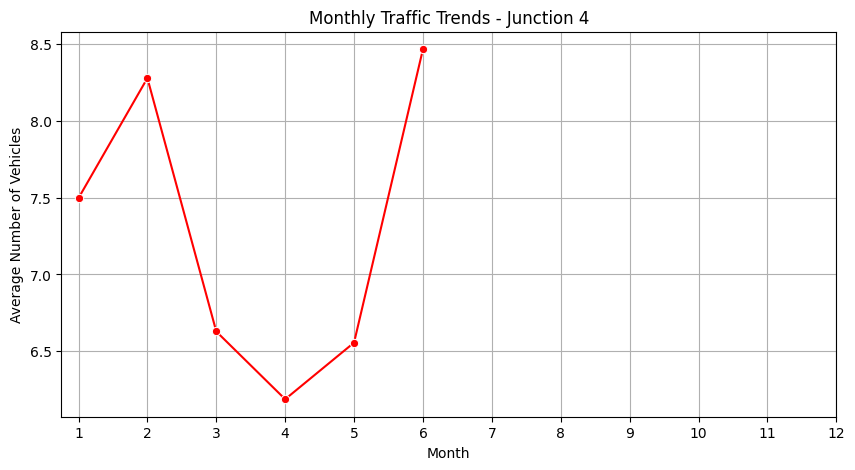

In [80]:
# Group data by month
monthly_traffic = junction_df.groupby('Month')['Vehicles'].mean()

# Plot the results
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_traffic.index, y=monthly_traffic.values, marker="o", color="red")
plt.title(f"Monthly Traffic Trends - Junction {junction_id}")
plt.xlabel("Month")
plt.ylabel("Average Number of Vehicles")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


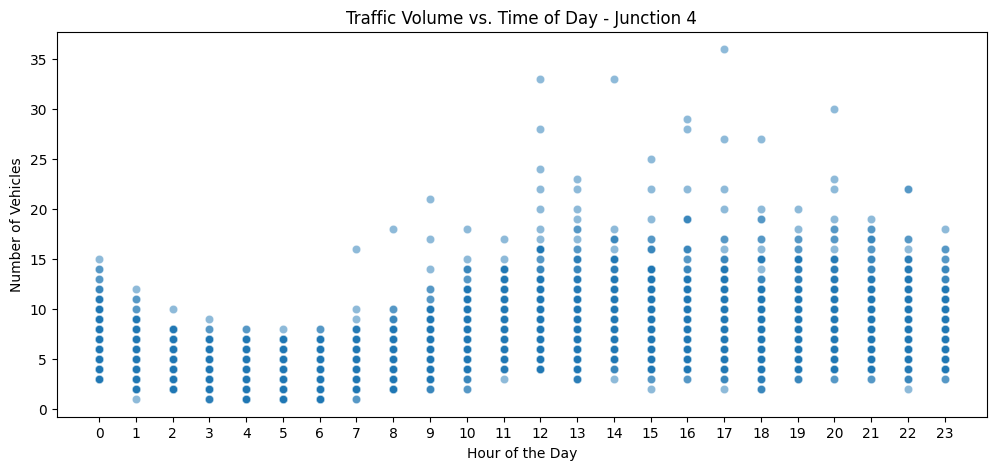

In [81]:
# Scatter plot for Vehicles vs. Hour of the Day
plt.figure(figsize=(12, 5))
sns.scatterplot(x=junction_df['Hour'], y=junction_df['Vehicles'], alpha=0.5)
plt.title(f"Traffic Volume vs. Time of Day - Junction {junction_id}")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Vehicles")
plt.xticks(range(0, 24))
plt.show()


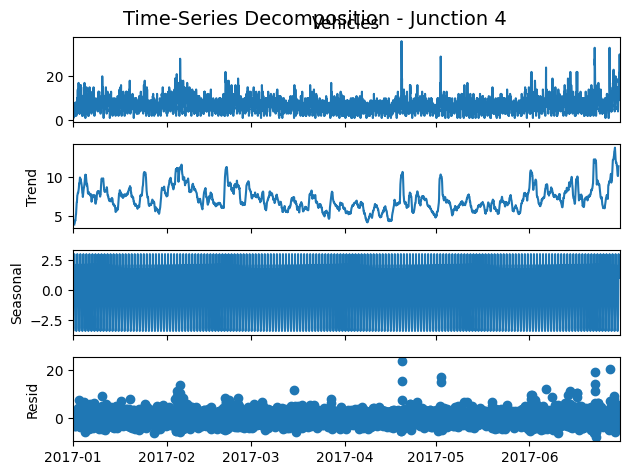

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set DateTime as index
junction_df.set_index('DateTime', inplace=True)

# Perform time-series decomposition
result = seasonal_decompose(junction_df['Vehicles'], model='additive', period=24)

# Plot decomposition
result.plot()
plt.suptitle(f"Time-Series Decomposition - Junction {junction_id}", fontsize=14)
plt.show()


<ipython-input-83-b97c36c5410b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=junction_df['Congestion_Level'], palette="coolwarm")


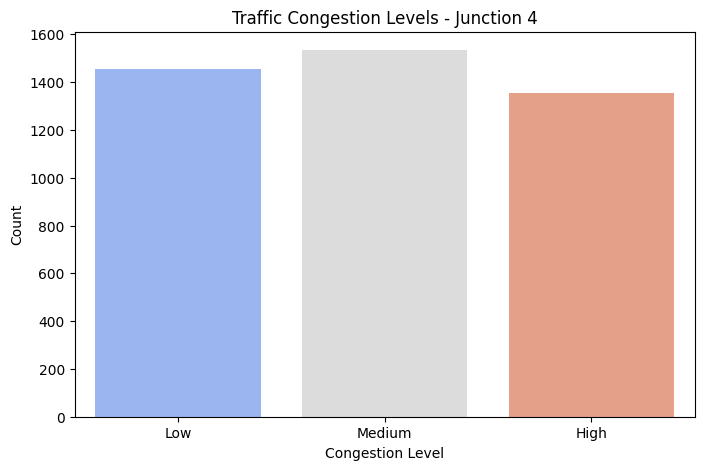

In [83]:
# Define congestion levels using quantiles
junction_df['Congestion_Level'] = pd.qcut(junction_df['Vehicles'], q=3, labels=['Low', 'Medium', 'High'])

# Countplot for congestion levels
plt.figure(figsize=(8,5))
sns.countplot(x=junction_df['Congestion_Level'], palette="coolwarm")
plt.title(f"Traffic Congestion Levels - Junction {junction_id}")
plt.xlabel("Congestion Level")
plt.ylabel("Count")
plt.show()


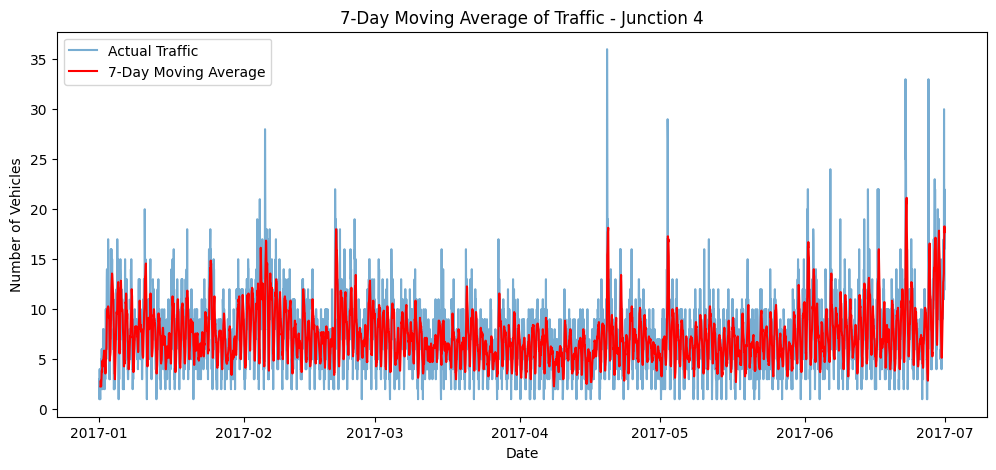

In [84]:
# Calculate moving average
junction_df['Moving_Avg_7'] = junction_df['Vehicles'].rolling(window=7).mean()

# Plot moving average
plt.figure(figsize=(12, 5))
sns.lineplot(x=junction_df.index, y=junction_df['Vehicles'], label="Actual Traffic", alpha=0.6)
sns.lineplot(x=junction_df.index, y=junction_df['Moving_Avg_7'], label="7-Day Moving Average", color='red')
plt.title(f"7-Day Moving Average of Traffic - Junction {junction_id}")
plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.show()


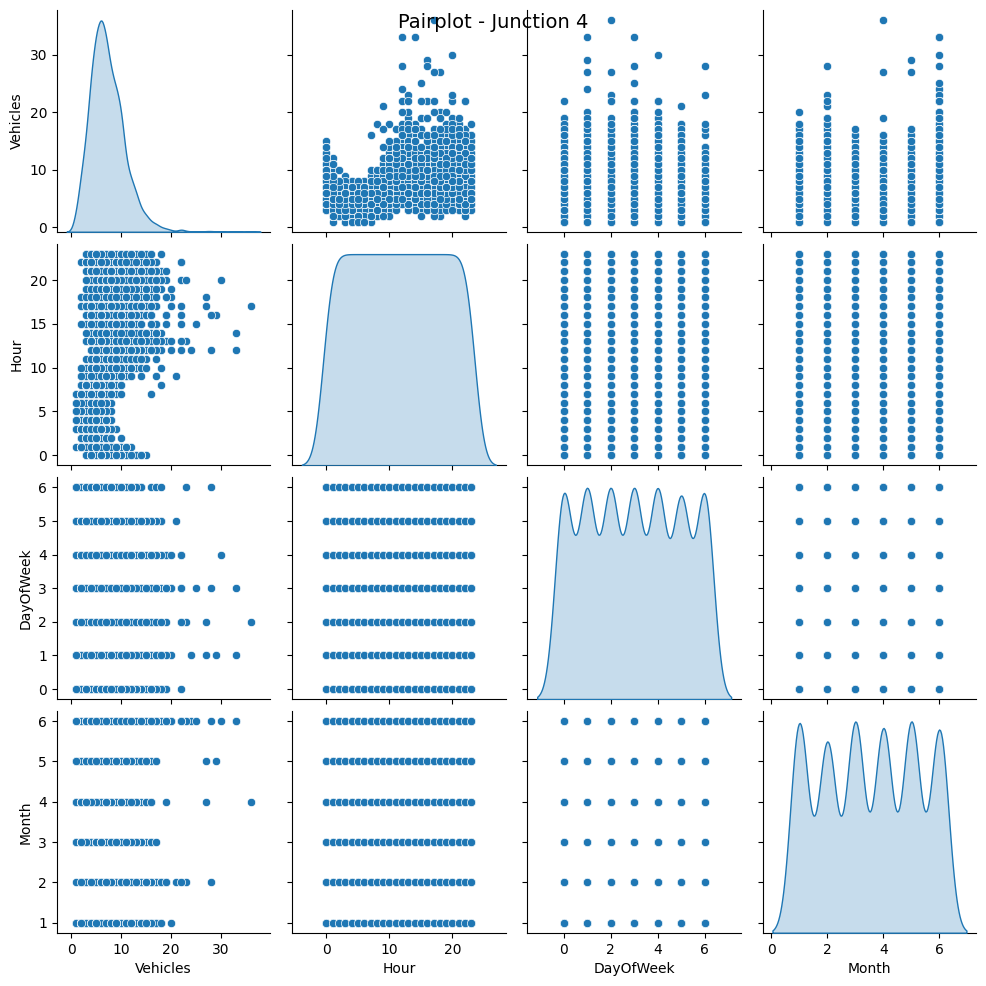

In [85]:
# Pairplot for traffic analysis
sns.pairplot(junction_df[['Vehicles', 'Hour', 'DayOfWeek', 'Month']], diag_kind="kde")
plt.suptitle(f"Pairplot - Junction {junction_id}", fontsize=14)
plt.show()


<ipython-input-86-4a1f4564beab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=junction_df['Month'], y=junction_df['Vehicles'], palette="viridis")


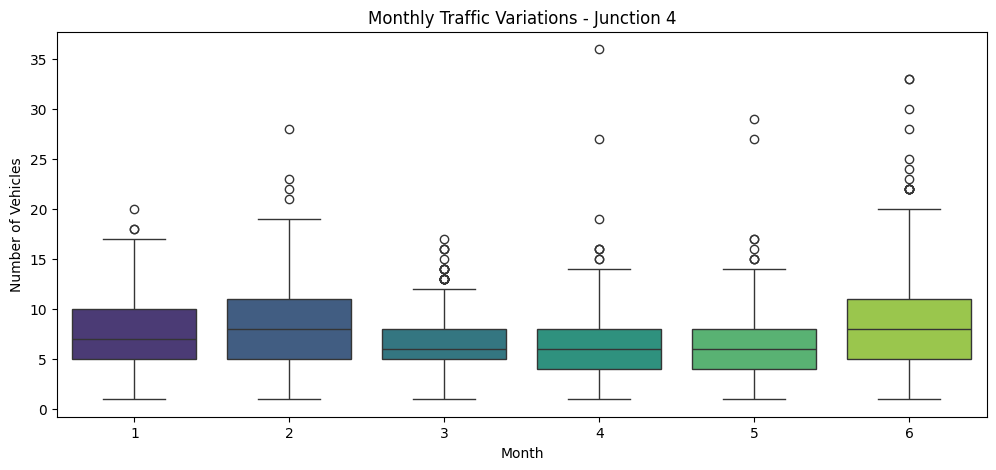

In [86]:
# Boxplot for seasonal traffic variations
plt.figure(figsize=(12, 5))
sns.boxplot(x=junction_df['Month'], y=junction_df['Vehicles'], palette="viridis")
plt.title(f"Monthly Traffic Variations - Junction {junction_id}")
plt.xlabel("Month")
plt.ylabel("Number of Vehicles")
plt.show()


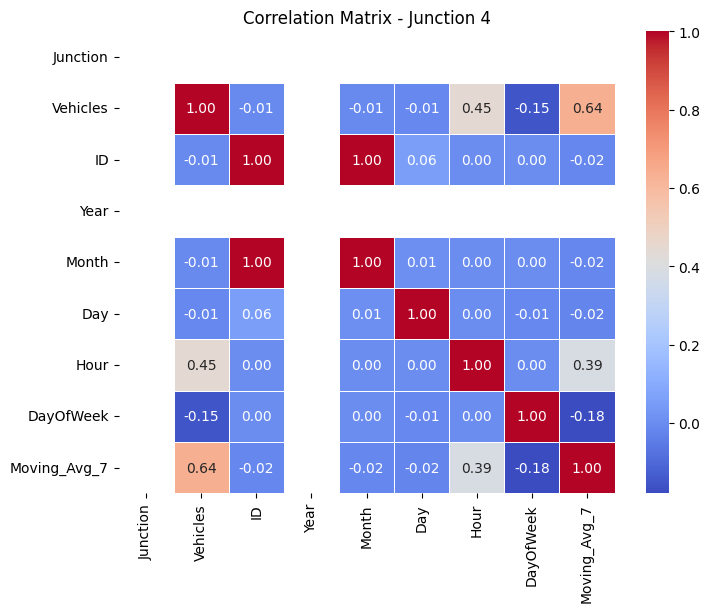

In [87]:
# Convert categorical columns to numeric (if any)
junction_df_numeric = junction_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = junction_df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation Matrix - Junction {junction_id}")
plt.show()


In [88]:
def remove_unimportant_features(df, threshold=0.85):
    """
    Removes features that are highly correlated with each other
    or do not contribute significantly to traffic prediction.

    Args:
    df (pd.DataFrame): The dataframe containing traffic data.
    threshold (float): Correlation threshold for dropping features.

    Returns:
    pd.DataFrame: Dataframe with removed features.
    """

    # Select only numerical columns
    df_numeric = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = df_numeric.corr().abs()

    # Find upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with high correlation
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop unimportant features
    df_reduced = df.drop(columns=to_drop, axis=1)

    print(f"Removed Features: {to_drop}")

    return df_reduced

# Apply the function to remove unimportant features
junction_df = remove_unimportant_features(junction_df)


Removed Features: ['Month']


In [89]:
print(f"Remaining Features after feature selection: {junction_df.columns.tolist()}")


Remaining Features after feature selection: ['Junction', 'Vehicles', 'ID', 'Year', 'Day', 'Hour', 'DayOfWeek', 'Congestion_Level', 'Moving_Avg_7']
